<a href="https://colab.research.google.com/github/bernardo9830/MachineLearning-DL/blob/main/Machine_Learning_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNIGN AND DEEP LEARNING
An overview of pratical and mathematical aspects of these disciplines.
We're following different books and papers. Finally we're working about different kaggle projects and discover every mathematical aspect.



In [7]:
import sys
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## Perceptron Model ##



The idea of perceptron model is motivated by the *Warren McCullock* and *Walter
Pitts* about the works on brain cell as logic gate with output $0$ or $1$. In general the brain cell is a neuron that receives chemical and electrical signals and processes these. There are some dentrities that transport information to the body of the neuron and neurons are interconetted wich other by the axons. When the signals execed an certain **threshold** then neurons fire or not.

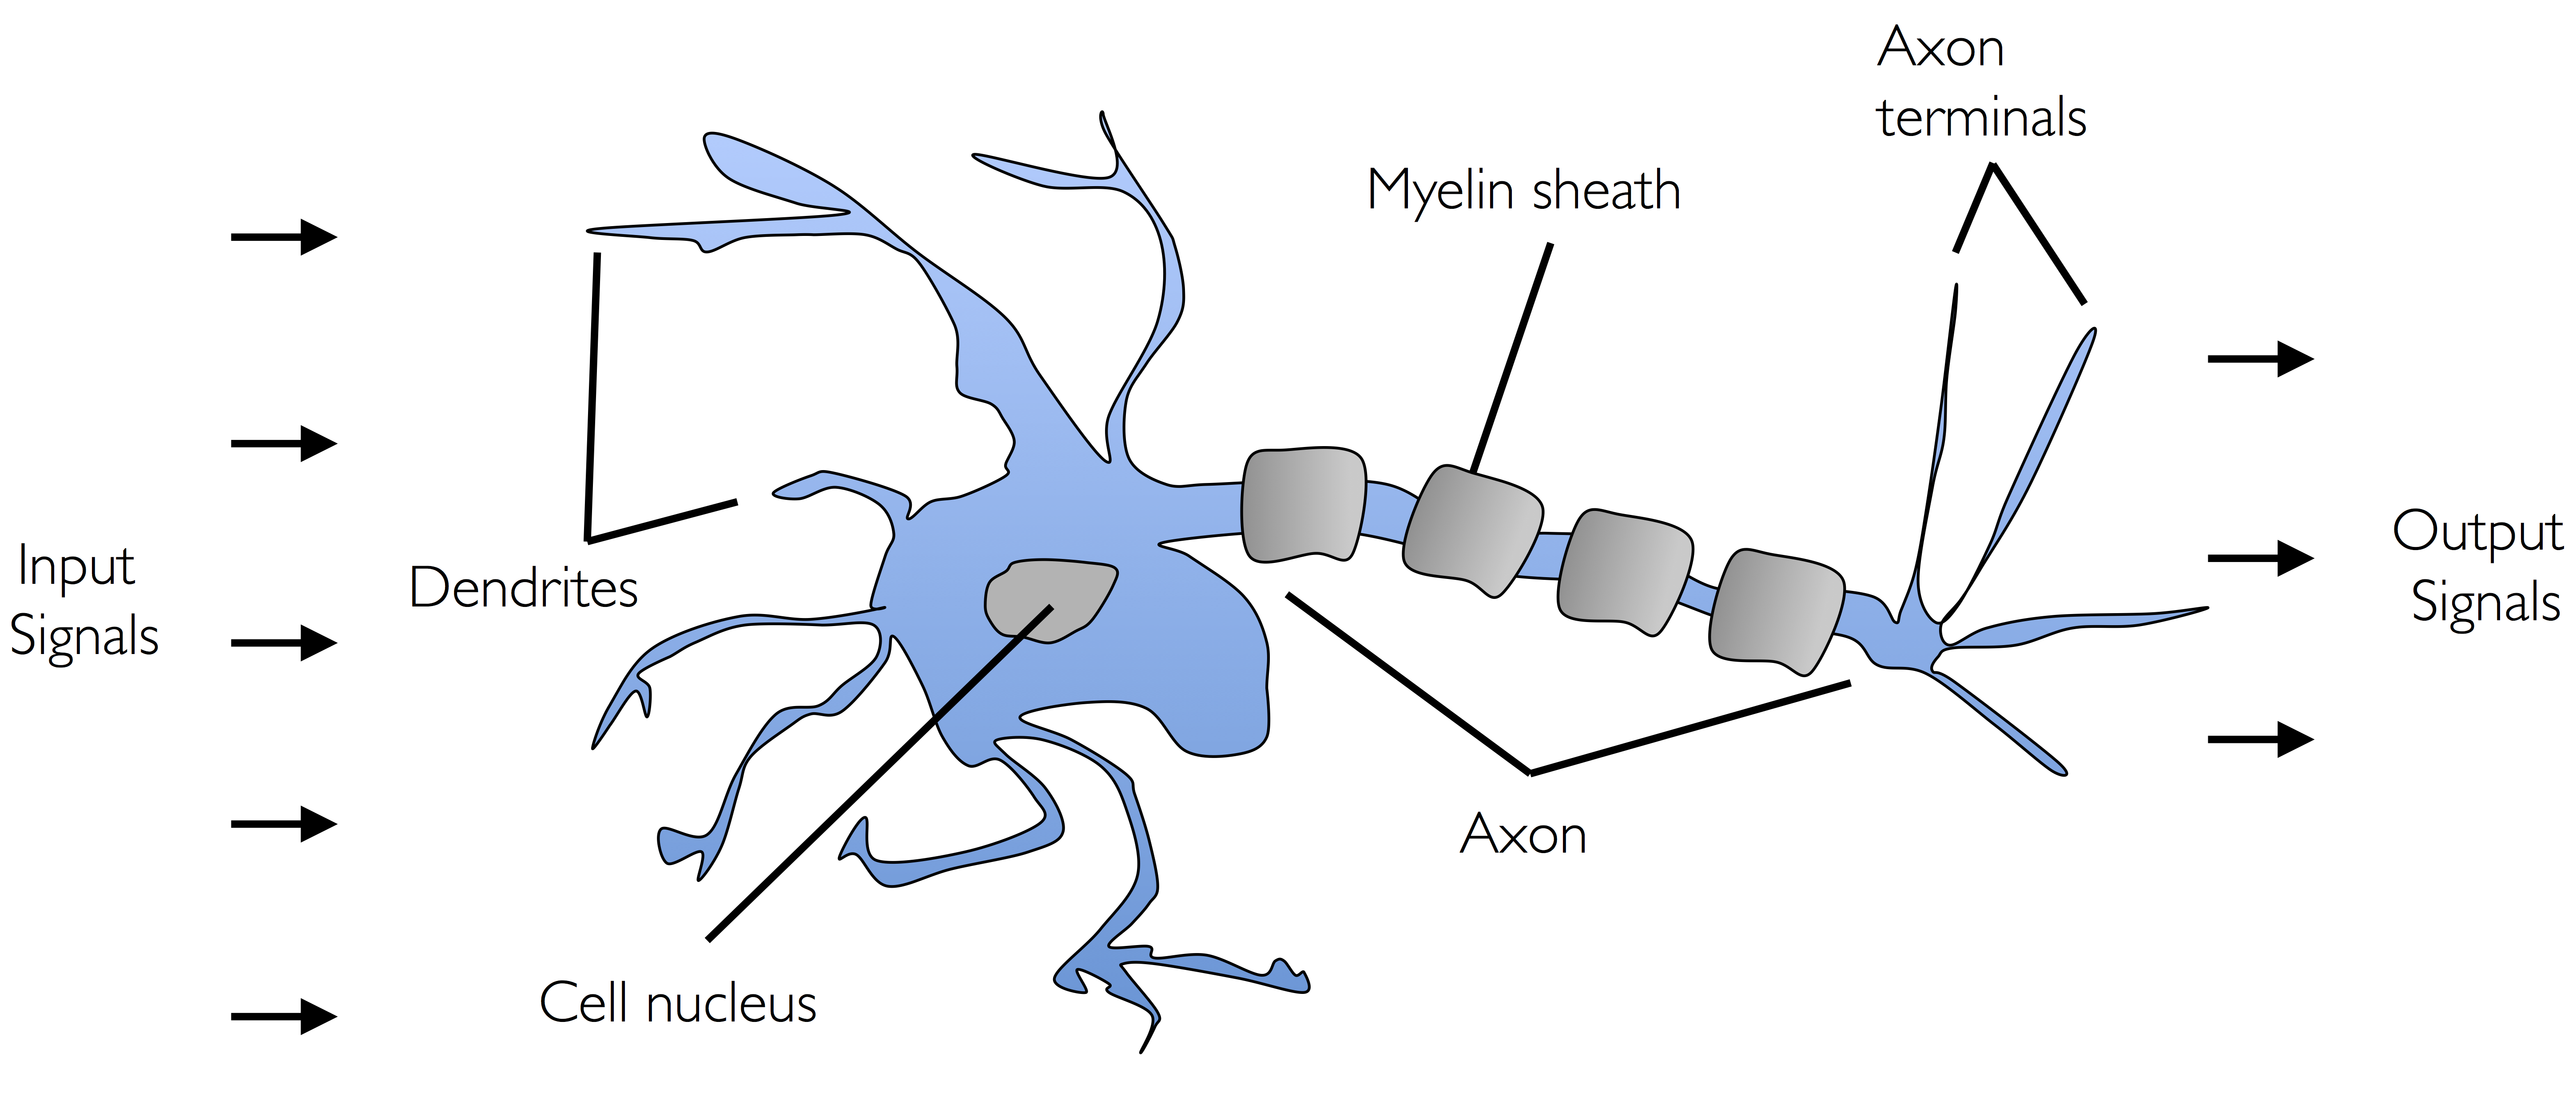

In [ ]:
from IPython.display import Image
Image(filename='./02_01.png', width=500)

# Formal Definition of Perceptron #

Rosenblatt pubblished a learning rule based on the MCP neuron model (The Perceptron: A Perceiving and
Recognizing Automaton, ) With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal coefficients weights that are multiplied by the features vector, to predict if a sample belongs to one class or the other.

The problem that we can risolve is a **Classification problem**.

The classification problem in machine learning is an important task. Given a *labeled* dataset (that is a dataset with a features vectors and the respective label classes) $D \in \mathbb{R}^{n} \times \mathcal{C}$ where $\mathcal{C}$ is the set of the classes we want to approximate very well the unknown function:
$f: Π_{1}(D) \to \mathcal{C}$ such that $f(x^{i}) = y^{i}$.

Some observations:


*   $Π_{1}(D)$ is the imagine of the projection map on the first component. So it is the set of the samples.
*   Approximate in this case is a little fuorviant, because we don't know exactly the relation about labels and features. We so want construct a classifier $h(x)$ that performs well on the data points and about the classification of unseen data points(*test set*, we'll discuss the pipeline of a machine learning problem in the latter sections).
* How choose this **classifiers**? The classifiers in general is called hypothesis, because we want navigate the **Hypothesis space** to determine a well classifiers. Hypothesis space is a parametrization of class of functions,
$H(\theta) := \{h_{\theta}(\cdot) \ | \ \theta \in \mathbb{R}^{n+1} \}$
* The goal is optimize a fixed *cost function* to find the optimal parameters $\bar{\theta} \in \Theta \subset \mathbb{R}^{n+1}$ that fit data points.

A mathematical formulation it'll be given in the appendix of this section.





Suppose now to work with 2-dimensional Dateset for a binary classification problem that is $\mathcal{C} = \{-1,1\}$. A perceptron model maps a linear transformation of the features vector with some coefficients $T_{w}(x)=w^{T}x= w_{1}x_{1}+ \dots + w_{n}x_{n} = z$. The output of this functions is called net input. Then we have a decision function to decide the classification outputs:
$\delta(z)=
\begin{cases}
0 & \text{if} \ z \geq \theta \\
1 & \text{if} \ z < 0
\end{cases}
$

In this case $\theta$ is a treshold.

In a simple way we can introduce an auxiliar features $x_0=1$ and $w_0=-\theta$ to obtain the compact formula:

$\delta(z)=
\begin{cases}
1 & \text{if} \ z \geq 0 \\
-1 & \text{if} \ z < 0
\end{cases}
$

The value $-\theta$ is called *bias*.




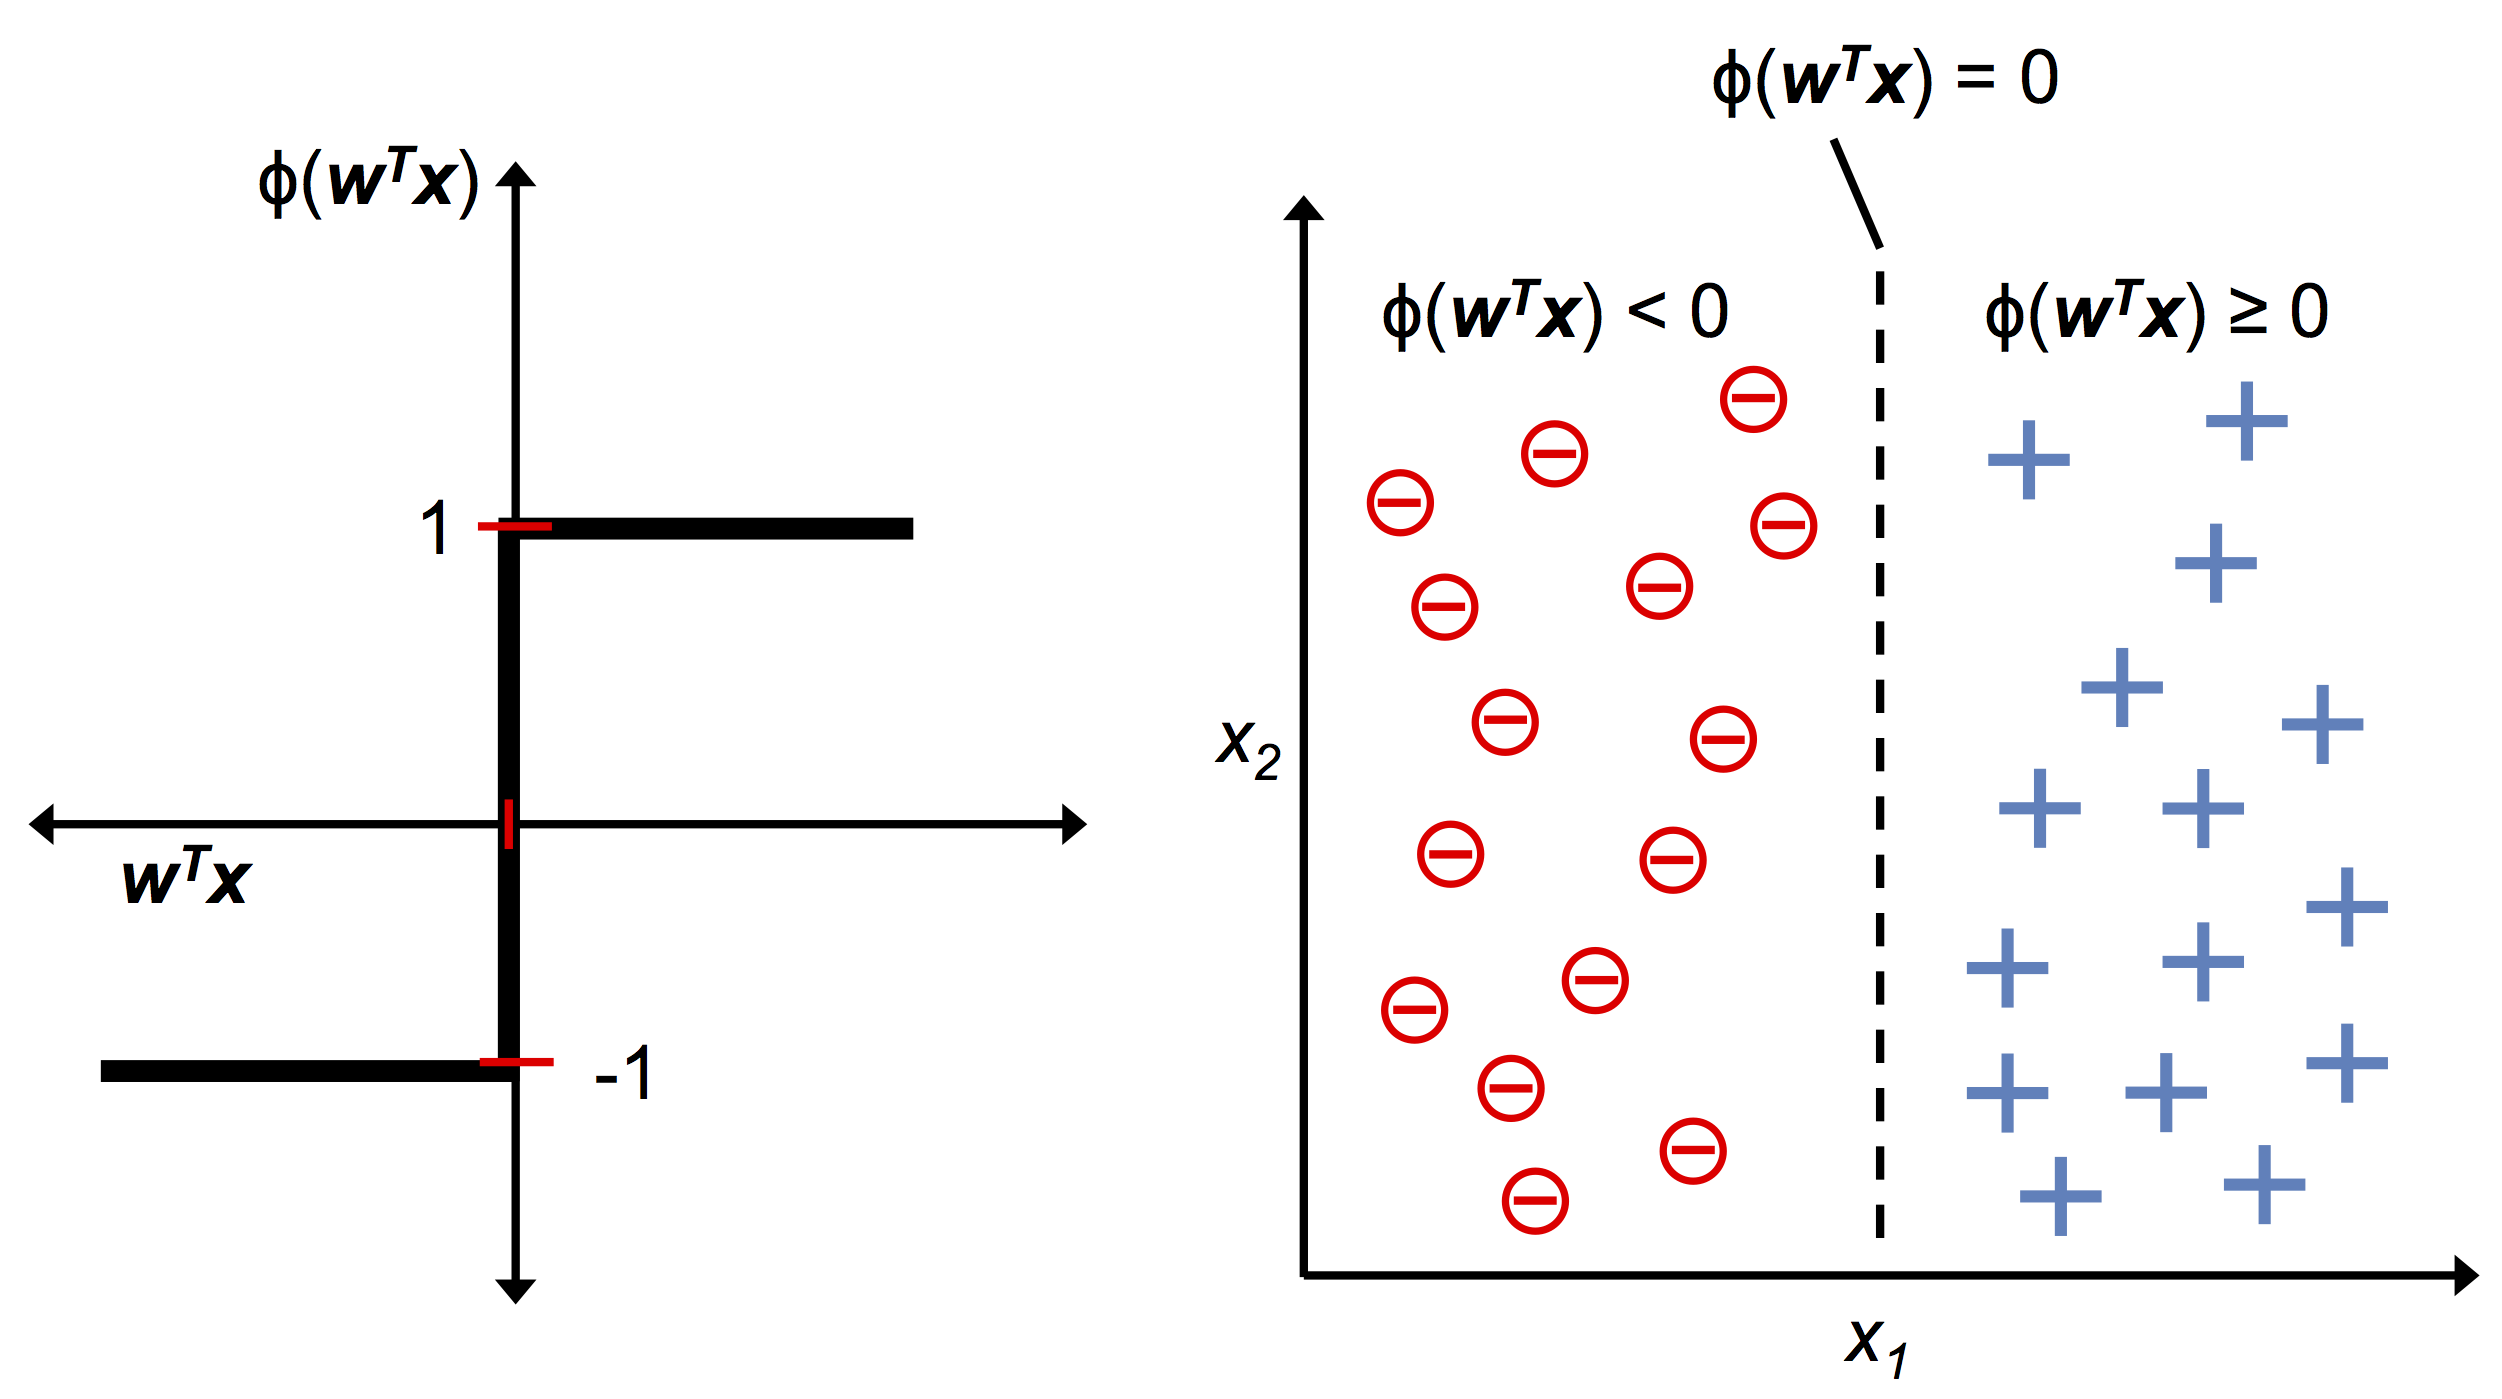

In [ ]:
Image(filename='./02_02.png', width=500)

#Perceptron training rule#

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain
works: it either *fires* or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:


*   Initialize a small random vector of weights $w$
*   For every **training example** $x^{(i)}$
    *   Calculate the output prediction $\hat{y}^{(i)}$
    *   Update the weights

It's important to observe that we ricalculate the successive output prediction only after the weights are all updates or simultaneous.

The update rule is:
$$w_{j}=w_{j}+Δw_{j}$$

Note:


*   $Δw_{j} := η(y_j-\hat{y}_{j})x_{j}$
*   $\eta$ is the learning rate. It is the step size of the learning process and it controls how aggressive is the learning rate.
* Infact we can prove that the convergence of this model is given only by linear separable classes of training examples and a sufficient learning rate. In this case we can find a decision surface tha separate the training examples.








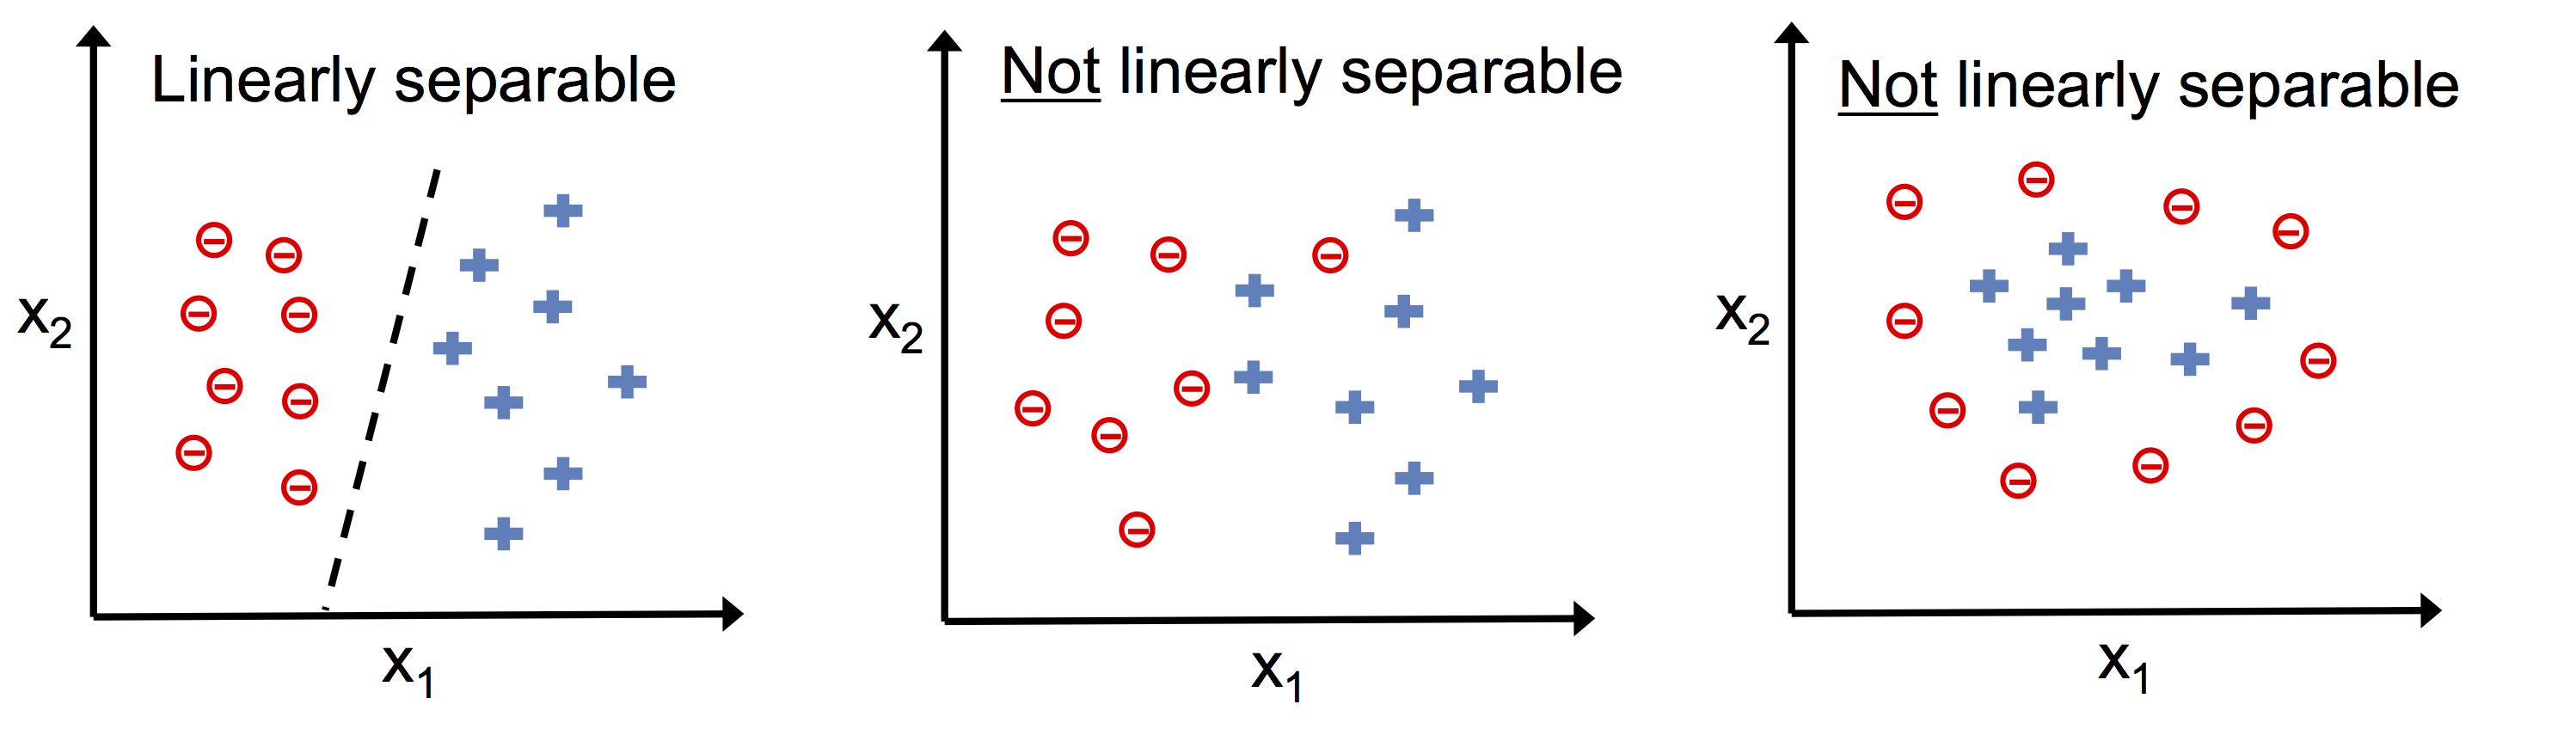

In [ ]:
Image(filename='./02_03.png', width=600)

Now we propose an example for visualize the role of $\eta$.
If we misclassify a sample $x$ with positive class then:
$$w_{j}=w_{j}+\eta(-1-1)x_j = w_j-2 \eta x_j$$

Now fixed $x_j$ we want reduce the value of $w_j$ since $z$ to be under the treshold.


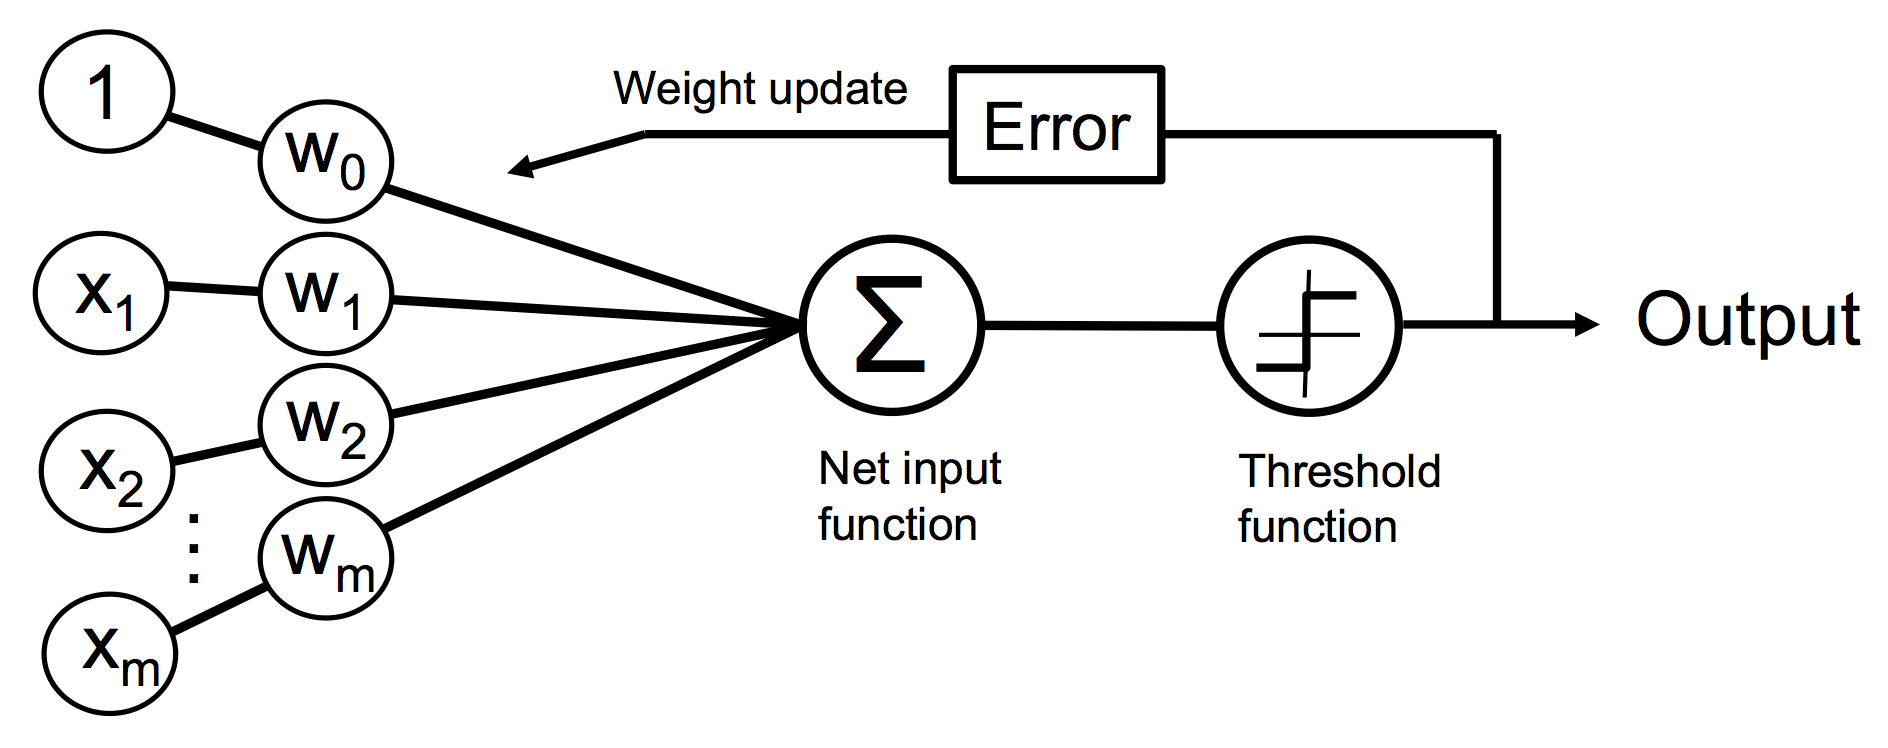

In [ ]:
Image(filename='./02_04.png', width=500)

Programming a perceptron class

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """

    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for i in range(X.shape[0]):
                dw = self.eta * (y[i] - self.predict(X[i])) * X[i]
                self.w_[1:] += dw
                self.w_[0] += self.eta * (y[i] - self.predict(X[i]))
                errors += int(dw.any())
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



##Training perceptron model on Iris Dataset##
In this example we choose only two features of tha samples and we build a binary classifier. The reason is only pratical, because it's more simple to visualize the work on a two dimensional features subspace. Another observation is that we can use a techinique called **One VS Rest** to build a multilabel classifier. Indeed we can train a binary classifier on a training set with a specified label(the significant label for the classifier) and set -1 or 0 as label for other samples wich belong other class. In this way we build $n$-classifier (where $n$ is the number of the classes) and when predict a future sample we'll choose the label with the highest confidence given by the classifiers.

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

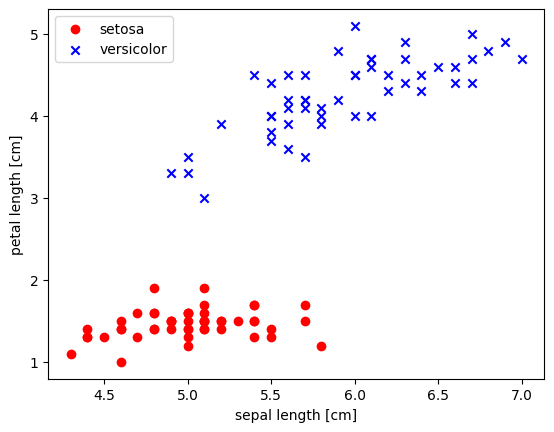

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

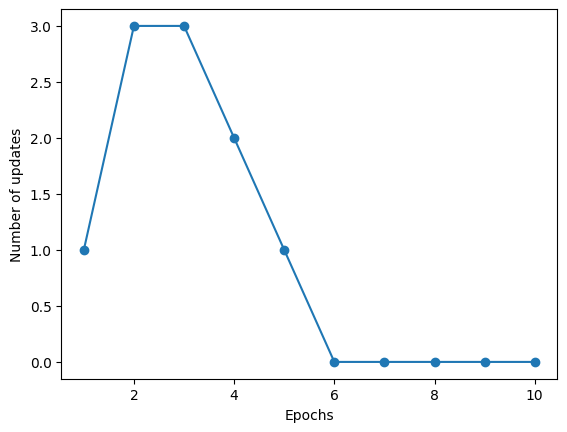

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

##Convergence of perceptron##

**Theorem**(Convergence of perceptron):
Let $\mathcal{D} = \{(x_{i},y_{i})\}_{i \in \mathbb{N}}$ a dataset with label $y_{i} \in \{0,1\}$. Suppose the dataset is linearly separable, that is exists an hyperplane that separates the two classes. Suppose, hence there is a some unit vector $w^{*}$ that the margine is $σ:=\text{min}_{(x,y) \in \mathcal{D}} \ y(w^{*} \cdot x) $. Then the perceptron algorithm converges after at most $N \geq \frac{R^{2}}{\sigma^{2}}$.

**Proof**:

Let $\text{max}_{x \in Π_{1}(\mathcal{D})} \  ||x||^{2} := R^{2}$ then suppose the perceptron makes a mistake with true class $y=1$:

$w^{n+1} = w^{n} + \eta(1-(-1))x = w^{n} + 2ηx $.

Then we evaluate:

$||w^{n+1}||^{2} - ||w^{n}||^{2} = 4\eta^{2}||x||^{2}+4\eta w^{n}\cdot x \leq 4\eta^{2}R^{2}$

Because $w^{n}\cdot x < 0$ since the perceptron make an error.

Then we obtain $||w^{n+1}||^{2} < ||w^{n}||^{2}+ 4\eta^{2}R^{2}$ and since we started with $w^{0} = 0$ we obtain $||w^{N}||^{2} \leq 4N\eta^{2}R^{2}$.

Now we have for Cauchy Schawrtz disequality $||w|| \ ||w^{*}|| \geq |w \cdot w^{*}|$ then we obtain $||w||^{2} \geq (w \cdot w^{*})^{2}$. Then for $N$ we obtain:
$w^{N} \cdot w^{*} =w^{N-1} \cdot w^{*} +2\eta w^{*}x \geq2\eta\sigma$.
Finally we obtain:

$||w^{N}||^{2} \geq 4N^{2}\eta^{2}\sigma^{2}$.

Now we can combinated the two inequalities and we obtain $N \leq (\frac{R}{\sigma})^{2}$. Note that we obtain convergence because after $N$ steps the vector weights $w$ it's similiar by cosine to $w^{*}$:

$1\geq \frac{w^{n} \cdot w^{*}}{||w^{n}||} \geq \frac{2N\eta\sigma}{2\sqrt{N} \eta R}= \sqrt{N}\frac{\sigma}{R}$


In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-29-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


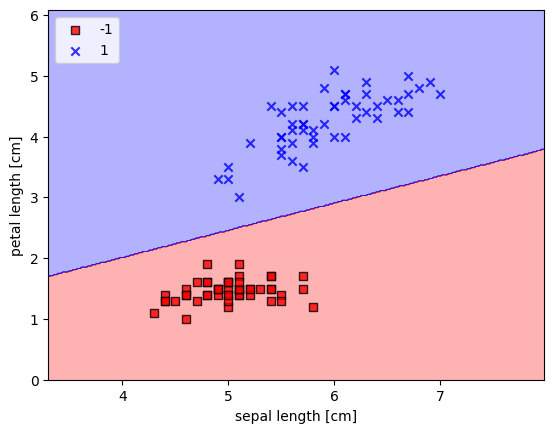

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

##ADA##
Now we'll discuss a different type of artificial neuron model **Adaptive Linear Neuron**.
In this case the key difference beetwen perceptron is putting an activation function to update the weights. Infact instead to update the weights incrementally after evaluate the predicted class labels with true labels, we'll calculate the sum of errors given by activation functions and update weights. The process is called **batch gradient**.

First of all we define and activation function as $\phi(z)=z=w^{T}x$. Then we must define an **cost function** $J(w;x)$ to minimize. In this case we take the *mean square error* $MSE(w)=-\frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-\phi(z^{(i)}))^{2}$.
The principal advantage is that the cost function is differentiable, then it's convex. This is important because we'll utilize a **gradient descedent** to update the weights.

The gradient descedent works as following: we'll calculate the gradient of the cost function and take the opposite direction of the gradient because is the steepest descedent direction. Then we expected that the algorithm converges to a local minimum or global minimum.

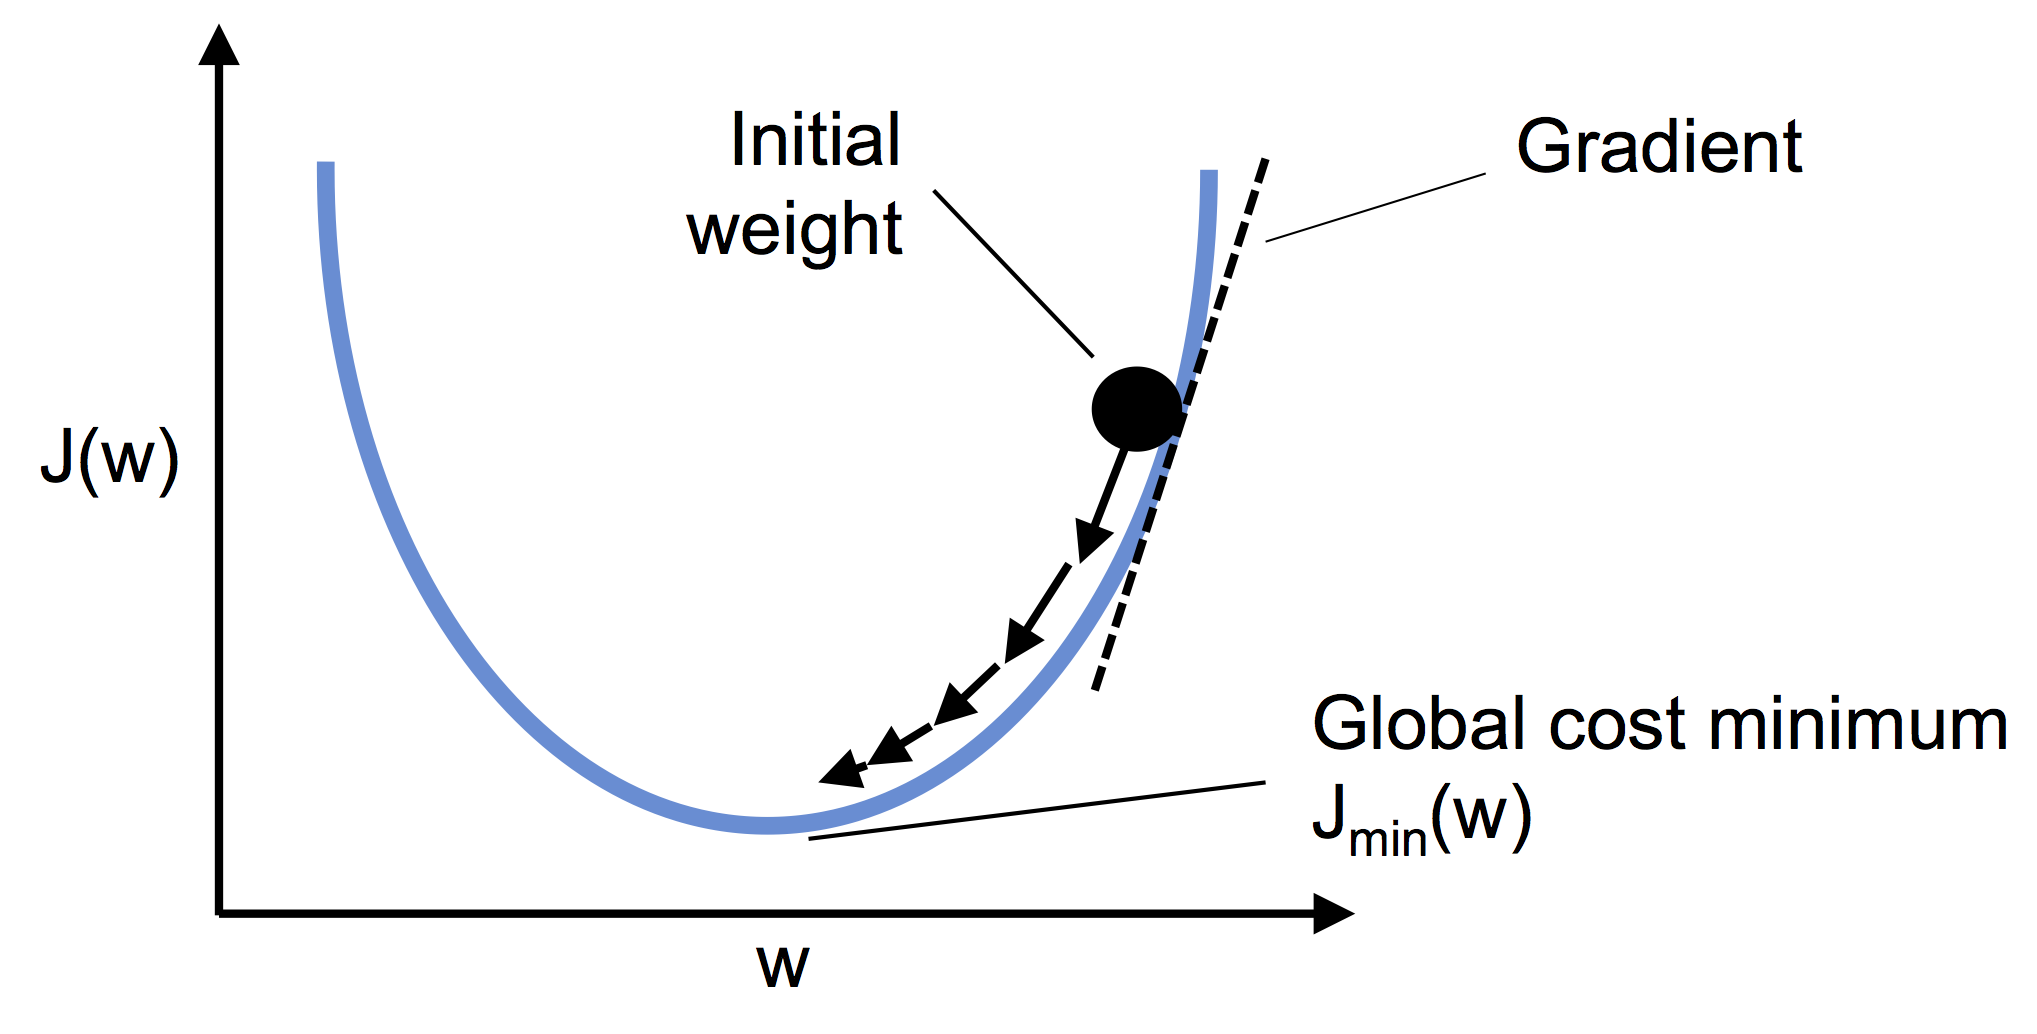

In [ ]:
from IPython.display import Image
Image(filename='./02_10.png', width=500)

The training rule for a weights vector is:

$w := w +dw$ and $dw=-\eta ∇_{w}J(w)$
Now projecting on every components $j=1 \dots m$ the dimension of a features subspace, and for a fixed training example $i$ we'll have:

$\frac{δJ}{δw_{j}}(w)=-(y-\phi(z^{i}))x^{i}_{j}$ and then:

$w^{i}_{j}= w^{i}_{j} + \eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}_{j}$

In general without fixed a training example we'll obtain:
$w_{j} = w_{j} + \eta \sum_{i=1}^{n}(y^{(i)}-\phi(z^{(i)}))x^{(i)}_{j}$

**Problems of convergence of gradient descedent**
The step size is determinated by $\eta$. This **hyperparameter** regualates the aggressivity of minumum research. If we set a large value of $\eta$ we may not go on a minimum because we may *overshoot* the minimum. If we set a very small learning rate we may go on minumum very slowly. Another problem is the cost function form. Minimizing a convex function is simpler problem than minimizing a non convex function. For a convex optimization there are a suitable conditions for wich we'll take the convergence. Another problem is if the function has got a lot local minimum. We'll discuss it in the appendix.

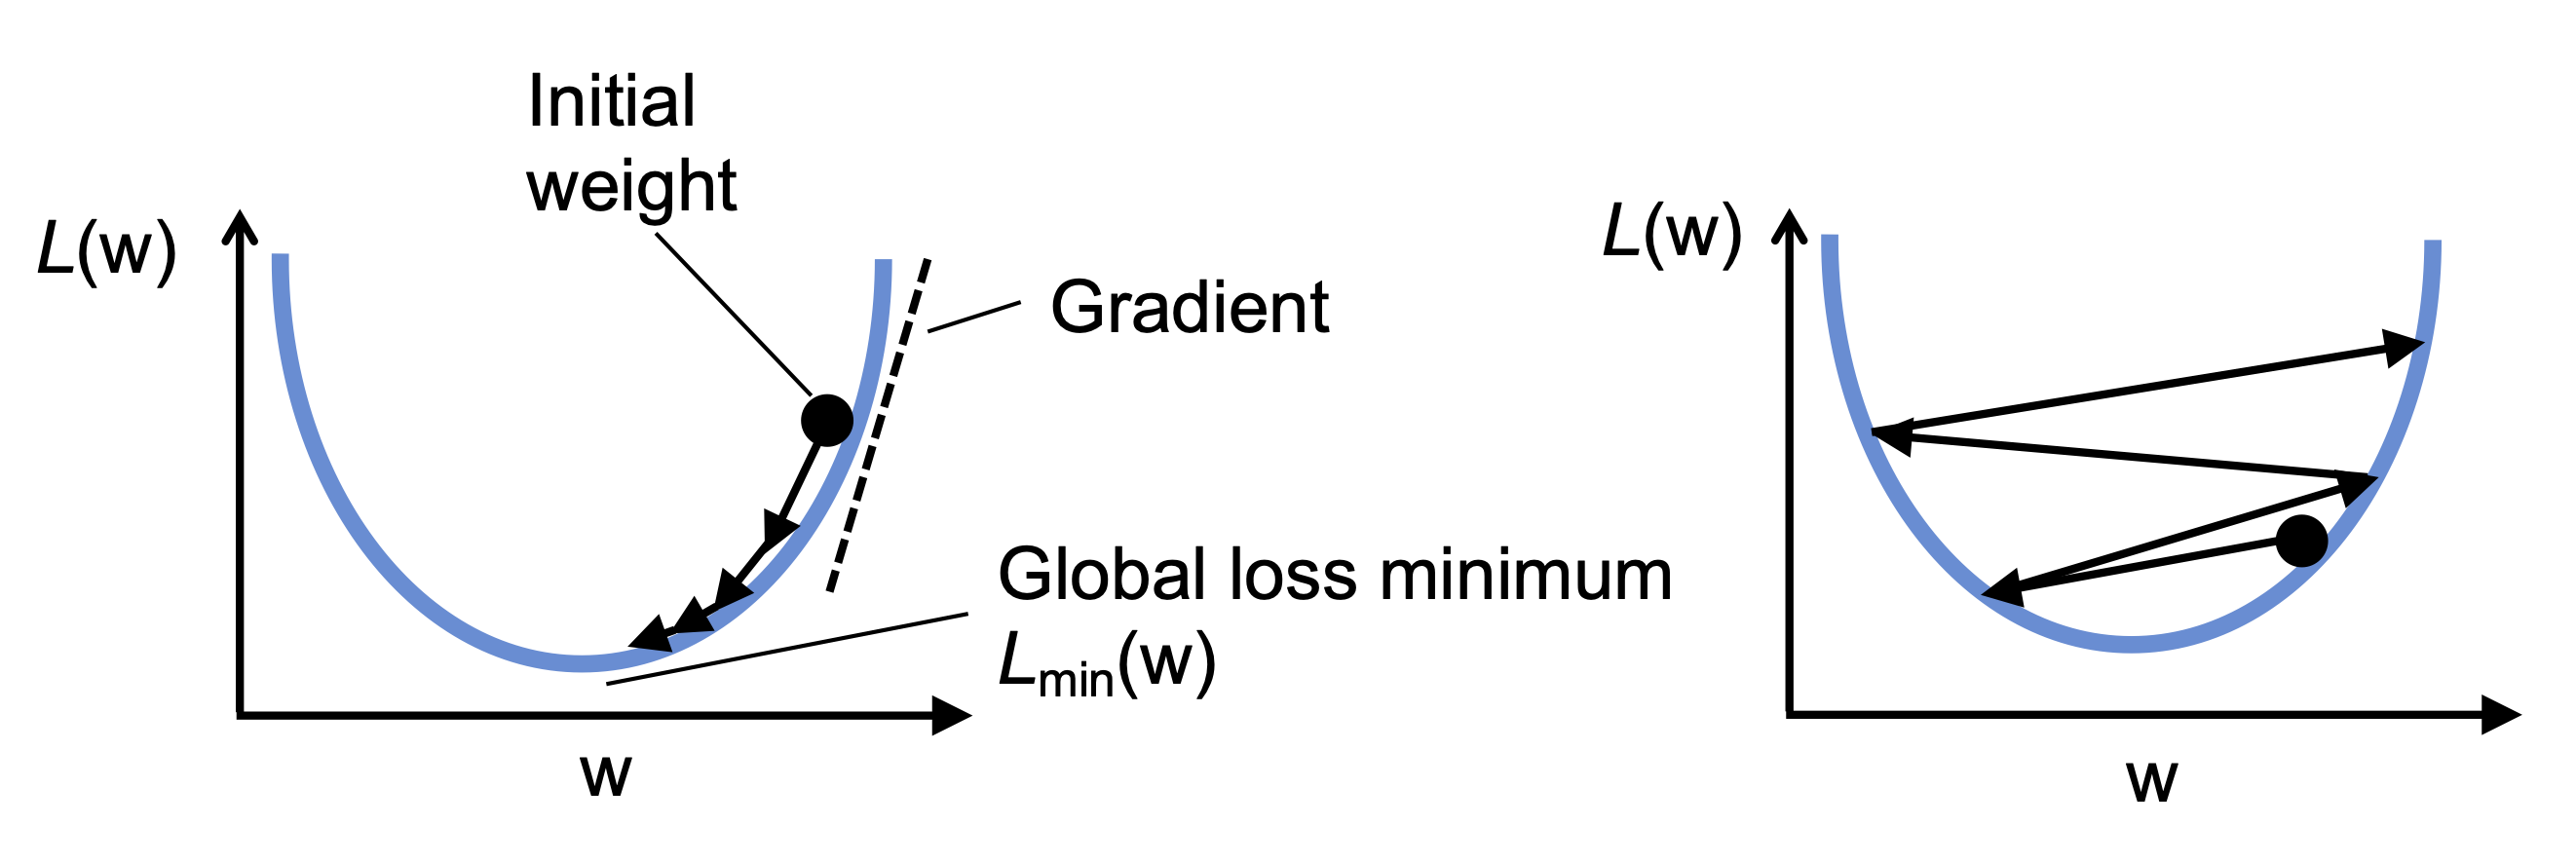

In [ ]:
from IPython.display import Image
Image(filename='./02_12.png', width=500)

In [ ]:
import numpy as np

class ADA(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost : list
      sum of squares cost function value for each epoch.
    """

    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost = []

        for i in range(self.n_iter):
          net_input = self.net_input(X)
          output = self.activation(net_input)
          errors = y-output
          self.w[1:] += self.eta*X.T.dot(errors)
          self.w[0] += self.eta * (errors.sum())
          cost = (errors**2).sum() / 2.0
          self.cost.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    def activation(self,X):
      return X

    def predict(self,X):
      return np.where(self.activation(self.net_input(X))>=0, 1,-1)



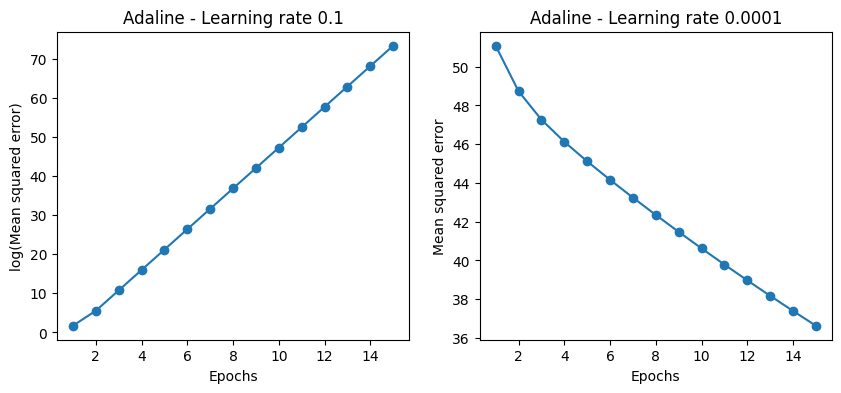

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = ADA(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost) + 1), np.log10(ada1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = ADA(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost) + 1), ada2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

**Stochastich Gradient descedent**

Instead to update the weights after evaluate the cost function over the whole training set, we calculate the average cost function for each training example and update the weights. It's more convenient for different reasones:



*   Evaluate for each epoch the cost function for the whole training set may be very expansive if we'are working with large amounts of data, that is not a surprise in machine learning project
*   Since we have more updates than batch gradient descedent we can go on convergence more fast than gradient descedent.
* The stochastic gradient discedent is an approximation of gradient descedent and since the update is made on single training example, the error surface is noiser than gradient descedent and we have the advantage to jump the local minimum

So we update the weights incrementally:

$dw=\eta(y^{i}-\phi(z^{i}))x^{i}, \ \ w:=w+dw$

To obtain
satisfying results via stochastic gradient descent, it is important to present it training prevent cycles. A compromess beetween *batch gradient* and *stochastich gradient* is a **mini batch gradient descedent**. We use a random small subsets of training data called **batch** to update weights. The rule is as follow:
* Take a random subsets $\{x_{i},y_{i}\}_{i=1 \dots k} \subset \mathcal{D}$
* Calculate the cost function given by this subset.
* Update the weights

Another important question, it's that stochastic gradient descedent is importnat for **online learning**. In online learning we're working with a flow continuos of data, and SDG may give to the model the ability to change adaptive as new data arrive. So we can discard the older training examples and use a new data points as training set.


**Adaptive learning rate**.

It's important to use an adaptive learning rate given by monotoring the behavior of the training step. For example we can use $\eta(epoch,c_1,c_2) = \frac{c_1}{\text{number of iterations}+c_2}$. This learning rate decreases over the time. It may be important, because if at fixed epoch we are close to the minimum, we would reduce at next iterations the step size to prevent overshotting the local/global minimu.



In [ ]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta *  xi * (error)
        self.b_ += self.eta *  error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

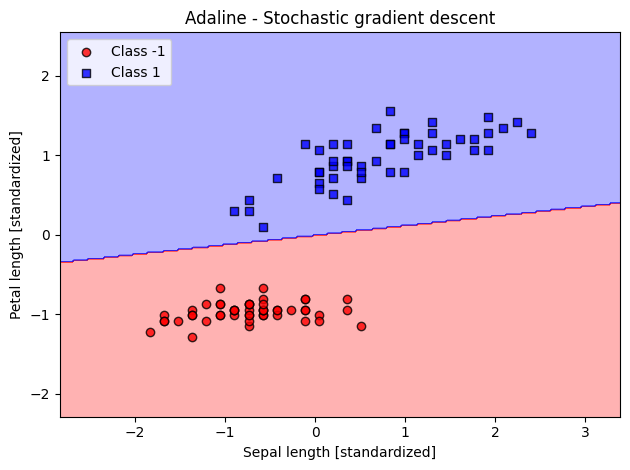

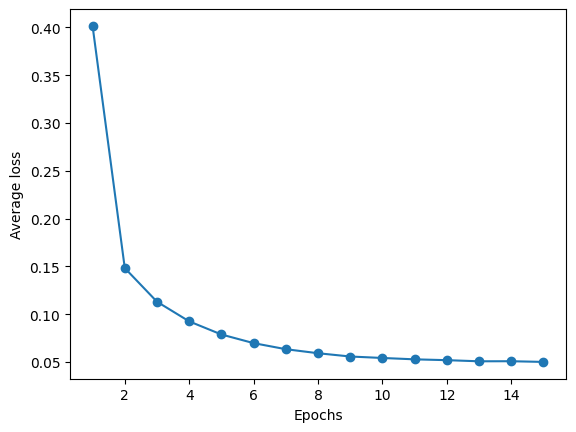

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

**SCIKIT-LEARN**

Scikit learn is an importan machine learning library wich provides different machine learning library and implemented function for *feature scaling*.

In a classification problem we choose a different classification algorithms that depends on the problem. There are five main step that are involved in training step of a model:

* Collect a data samples and create a training set
* Choosing a performance metric
* Choosing a classifier
* Evaluating the performance of the model
* Tuning the algorithm

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

The function *train_test_split* provides arrays as X_train etc.. to split dataset in training data and test set. The function shuffle the dataset before splitting, otherwise, all class 0 and class 1 samples would have
ended up in the training set, and the test set would consist of 45 samples from
class 2.

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


The parameter *stratify=y* implies that training data and test set has the same proportion of class labels.


An important method by scikit-learn is Standerscaler() that gives the normalized features:
$$x_{i} = \frac{x_{i}-\mu}{σ}$$

where $x_{i}$ is the feauters, $\mu$ the sample mean of the observation of the given features, while $\sigma$ is the sample standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

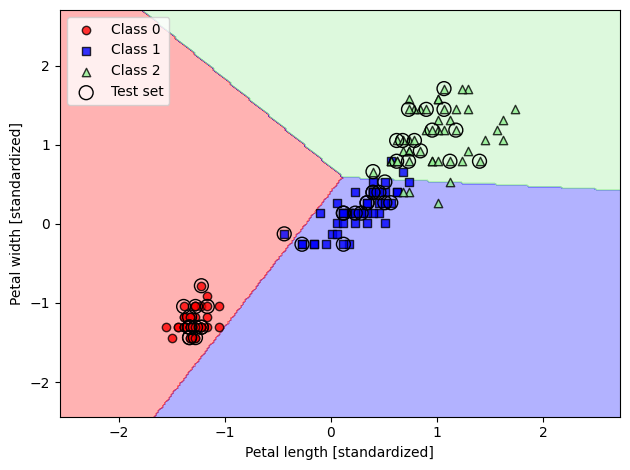

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

##Appendix##



**Mathematical Formulation of Machine Learning**

Machine learning is the field of study that involves the processing of information to gain insights for make predictions. The goal of machine learning is *learning* that is related to the process of information elaboration to perform different task.

In my opinion best definition of learning process is given by Tom Mitchell in the book Machine Learning:

Machine learning is the study of the learning ability of machines. For learning we'll refer to a task $T$, and we'll say a machine learns respect the experience $E$ and a measure perfomance $P$ if the performance $P$ evaluate on the task $T$ increases as improving the experience $E$.

**Different types of machine learning**

- Supervised Learning: In the task of supervised Learning we're working with **labelled training data**. So we have the tuples $(x,y)$ where $y$ is the label or solutions of data $x$. We feed this set in the training step and the objective is labelling an unseen record.
The principal algorithms are **classification** or **regression**.

- Unsupervised Learning: We feed in the training process an **unlabelled data** and we would obtain insights and pattern beetween data. An example is **Clustering**. It is a powerful algorithm and it can be used for create groups of clients with similiar preferences (for example in the task of Netflix or streaming company to suggest products or to discover the behavior of a certain population based on different features.)

- Semi-Surpevised Learning: We're working with labelled and unlabelled data. It's very useful when collect labelled training data is more expensive. For example some task of NLP arise in the domain of semi-surpevised learning.

**Setting the formulation problema of supervised learning**

In a supervised task we have a target function $f^{*}: \mathcal{X} \to \mathcal{Y}$ such that $\mathcal{X}$ is the input space and $\mathcal{D}=\{(x_{i},y_{i})\}_{\{i=1 \dots m\}} ⊂ \mathcal{X} \times \mathcal{Y}$ is the *labelled* dataset. The space is can be finite or countable dimensional and in this case we'll talk about **classification** problem or **regression** if is uncountable.
The goal, given the dataset $\mathcal{D}$ is to approximate $f^{*}$ as accurately as we can. That means we want to minimize the **Risk population** in a given function class:
$$\mathcal{R}(f)=\mathbb{E}[f-f^{*}]^{2}=\int_{\mathcal{X}}(f-f^{*})^2 \ d\mu(x)$$.

**Note**: We assume that $f,f^{*}$ are sufficiently regular since the expectation existis and it's well defined. So we take $f,f^{*} \in \mathcal{M}(\mathcal{X},\mathcal{Y})$ the space of all measurable functions, in particular $f,f^{*} ∈ L^{2}(\mathcal{X},\mathcal{B}(\mathcal{X}),\mu)$. In this case $\mu$ is a probability measure that represents the distribution of the data points.
We can set $\mathcal{L}:\mathcal{M}(\mathcal{X},\mathcal{Y}) × \mathcal{M}(\mathcal{X},\mathcal{Y}) \to  \mathbb{R}$ a **loss function** and consider $\mathcal{L}(f,f^{*})$ to generalize the risk population:

$$\mathcal{R}(f)=\mathbb{E}[\mathcal{L}(f,f^{*})]=\int_{\mathcal{X}}\mathcal{L}(f,f^{*}) \ d\mu(x)$$.

The principal key points of this problem are:

- Defining an *hypothesis space*. This is a set of functions to use to approximate $f^{*}$. We use $\mathcal{H}_{m}$ to define this set of function with $m$ the dimension of the space. We indicate an element of $\mathcal{H}_{m}$ as $f(\cdot, \theta)$ and use $ \Theta$ to parametrize the functions in $\mathcal{H}_{m}$
- Solving an optimization problem to find the optimal parameters.
$\min_{\theta} \mathcal{R}(\theta) = \frac{1}{n} \sum_{j=1}^{n} \mathcal{l}_{j}(\theta)$ where is $\mathcal{l}_{j}$ is the j-th loss term for example:
$$\min_{\theta} \mathcal{R}(\theta) = \frac{1}{n} \sum_{j=1}^{n}(f(x_{j},\theta)-f^{*}(x_j))^{2}$$
- Finally use gradient descedent as optimization algorithm:
$\theta_{k+1} =\theta_{k} - \eta \nabla \mathcal{R}_{n}(\theta_{k})= \theta_{k} - \eta \frac{1}{n} \sum_{j=1}^{n} \nabla \mathcal{l}_j(\theta_{k})$ Since the full gradient is an average over all
training samples and is costly to evaluate, in practice, one often randomly selects one term in that average and uses it instead of the full gradient. This leads to the stochastic gradient descent algorithm (SGD),

$$ \theta_{k+1} =\theta_{k} - \eta \nabla \mathcal{l}_{jk}(\theta_{k})$$

where $j_1,j_2 \dots$ are i.i.d random variables uniformly drawn from $\{1,2 \dots n \}$



**DENSITY ESTIMATION**


###Logistic Regression###
To describe logistic regression we start with some properties of probability theory.

First of all put a sequence of random variables $\{X_{i}\}_{\{i=1 \dots n\}}$ defined on a set $Ω$. We'll say that:
- Convergence in probability to a random variable $X$ if $∀ \ ϵ>0 \ \ lim_{n\to ∞}\mathbb{P}(|X_{n}-X|\geqϵ) = 0$
-Convergence in distribution if $F_{X_n}(x) \to F_{X}(x)$ on $ \mathcal{C}(R)$

Two central limit theorem:

1) If we have $X_1,X_2 \dots X_n$ random variable i.i.d in $\mathcal{L_{1}}$ space with mean $\mu$ then $S_{n}:=\frac{\sum X_{i}}{n}$ coverges almost sure to random costant variable $E[X_1]=\mu$

2) If we have  $X_1,X_2 \dots X_n$ random variable i.i.d in $\mathcal{L_{2}}$ space with mean $\mu$ and variance $\sigma^{2}<∞$ then the random variable
$Z= \frac{S_n -n\mu}{ \frac{\sigma}{\sqrt{n}}}$ converges in distribution to normal random variable $\mathcal{N}(0,1)$


Now suppose we have a population of size $n$ a sample of size $k$ of the population is a sequence $\{X_1 \dots X_{k}\}$ of i.i.d random variables. If we want estimate an unkwnown quantity $θ$ for example the mean of the population we can construct a point estimator. A point estimator is a function $\bar{\Theta}=h(X_1\dots X_n)$ of random sample.




**Evaluating estimators**

We'll say a point estimator $\bar{Θ}=h(X_1\dots X_n)$ is **unbiased** estimator if
$B(\Theta)=E[\bar{Θ}]-\theta=0 \ \forall \  \text{values of } \ \theta$.

For example the sample mean is unbiased estimator for the population mean.

Another metric is the **mean squared error**:
$$MSE(\bar{\Theta})=E[\bar{\Theta}-\theta]^{2}=Var(\bar{\Theta}-\theta)+(E[\bar{\Theta}-\theta])^2=Var(\bar{\Theta}-\theta)+B^{2}(\bar{\Theta})$$

We'll say a sequence of point estimators $\bar{\Theta}_n$ are consistent for $\theta$ if they converges in probability to $\theta$. It can be proved that the $MSE(\bar{\Theta}_n) \to 0$ for $n \to ∞$ then the sequence of estimators is consistent.

**Likelihood function**

If we have a sequence of random variable $\{X_1 \dots X_n\}$ i.i.d with a parametric probability distribution $P_{X_i}(\cdot | \theta)$ then we can define a function as parameter:
$$L(X=x_1 \dots X_n=x_n|\theta)=∏_{i=1 \dots n}P(X_i=x_i|\theta)$$.

For example if we have a *bernuallian* of parameters Θ/3 then a random sampling $X_i ≃ Ber(\frac{\theta}{3})$ the likelihood function for a given point sequence is:::
$L(\theta) = \frac{\theta^{\sum_i x_i}}{3^n} \cdot (1 - \frac{\theta}{3})^{\sum_i (1 - x_i)}$

The goal is to find the maximum estimators likelihood. For practice we'll work with $log(L(\cdot | \theta))$ that is:

$$ \max_{\theta} \ log(L(\cdot | \theta)) $$




Logistic regression is a popular classification model that performs very well on lineary separable classes.

**Definition**(odds ratio): The odds ratio can be written as $\frac{p}{1-p}$ where $p$ is the probability of a positive events.
Then we can define a logit of $p$ as: $\text{logit}(p) = \log(\frac{p}{1-p})$.

Logit function takes input values in range from $[0,1]$ and maps thes in a range of numbers. This express the relation beetween features and log odds:
$$logit(P(y=1|x))= w_0+w_1x_1+\dots w_nx_n=w^T x$$ with the usual convention $x_0=1$
Now we are interested to find the probability of a certain instance belongs to class y=1 that is the invers of logit function:
$$\sigma(z=w^tx)=\frac{1}{1+e^{-z}}$$


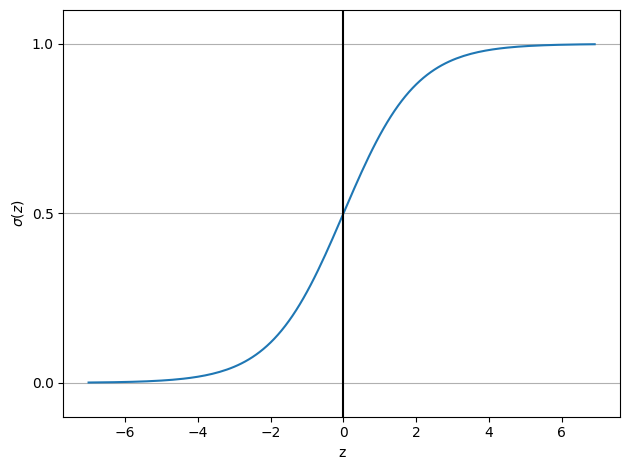

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()


The main difference beetwen ADA and Logistic regression is the activation function now is the sigmoide function

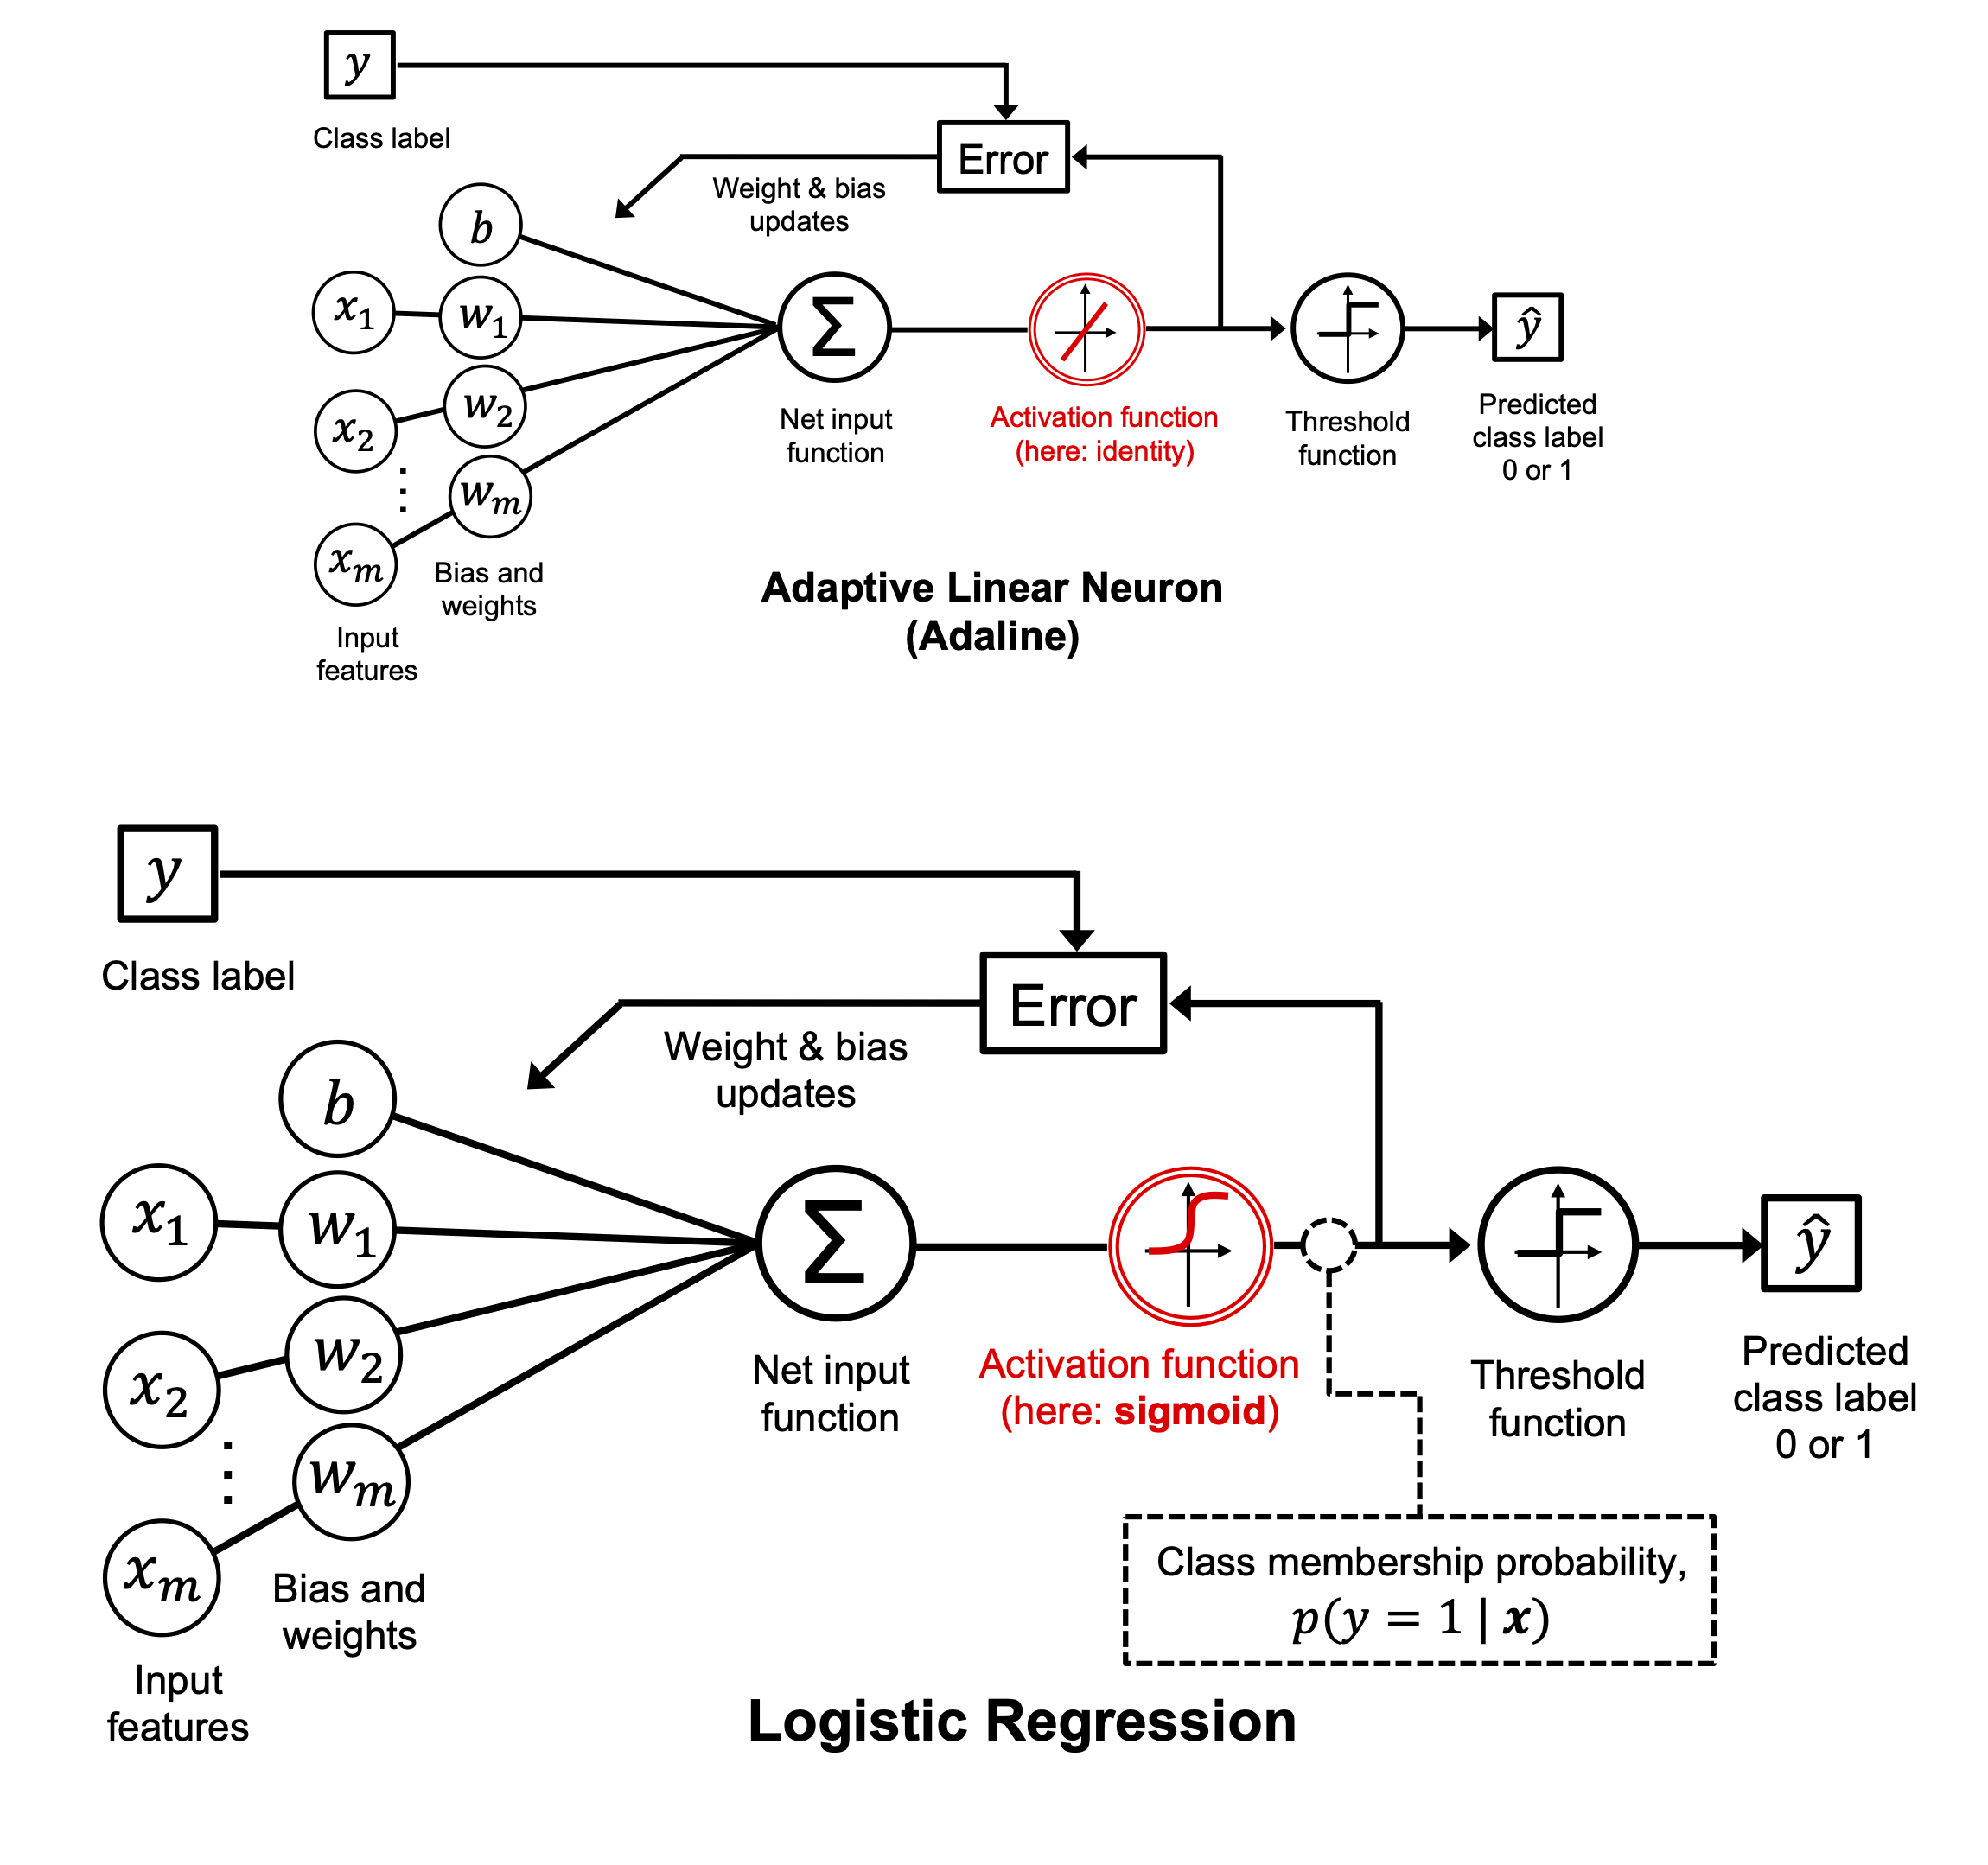

In [ ]:
from IPython.display import Image
Image(filename='./03_03.png', width=500)

So $\sigma(z)$ is the probability of $x$ belongs to the class $y=1$. If $\sigma(z)=0.8$ means the probability of $x$ to belongs to class $1$ is $80 \%$.
Then the predicted probability can be written as:
$\bar{y}=
\begin{cases}
1 & \text{if} \ \sigma(z) \geq 0.5 \\
0 & \text{if} \ \text{otherwise}
\end{cases}
$

**Binary cross entropy**:

The random variable that is the label class $Y$ is a Bernulliana: $Y ≃ Ber(σ(z))$ because rapresents the succes of a trial. Now suppose the sample points are drawn i.i.d then the Likelihood function can be written as:
$$L(\cdot | w) = P(y|x, w) = \prod_{i=1}^{n} P(y^i | x^i, w) = \prod_{i=1}^{n} \left( \sigma(w^T x^i) \right)^{y^i} \left( 1 - \sigma(w^T x^i) \right)^{1 - y^i}$$

Take a log-likelihood:

$$log(L(\cdot | w)) = \sum_{i=1}^{n}[y^{i}\log(\sigma(z^{i}))+(1-y^i)\log((1-\sigma(z^{i})))]$$
Now the goal is maximize this function respect $w$ or minimize the negative log likelihood that is the Binary cross entropy:
$$BCE(w|\mathcal{D})=-\sum_{i=1}^{n}[y^{i}\log(\sigma(z^{i}))+(1-y^i)\log((1-\sigma(z^{i})))]$$.

If we consider a single training example:

$$BCE(w,y^i,x^i)=-y^{i}\log(\sigma(w^{T}x^{i}))-(1-y^i)\log((1-\sigma(w^Tx^{i})))$$.

Then we obtain:
$BCE(w)=
\begin{cases}
-\log(\sigma(z^i)) & \text{if} \ y^i=1 \\
-\log(1-\sigma(z^i)) & \text{if} \ y^i=0
\end{cases}
$





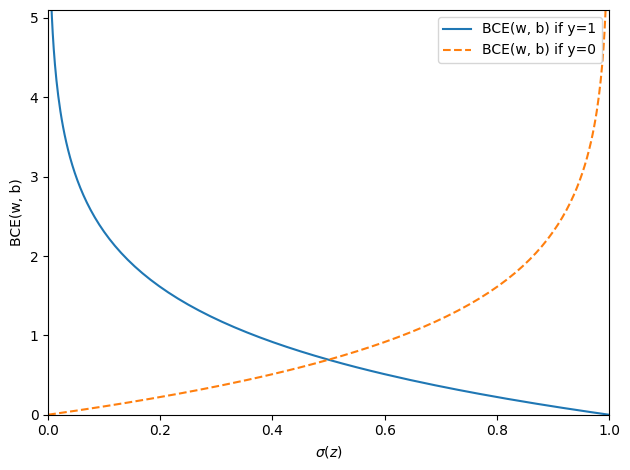

In [ ]:
def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='BCE(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='BCE(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('BCE(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

<ipython-input-6-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


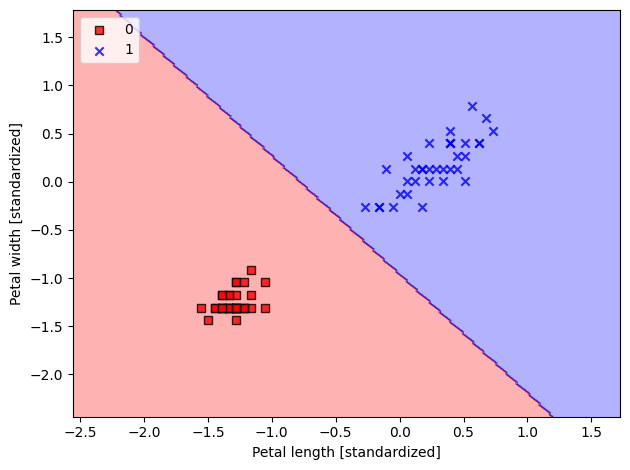

In [ ]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)





X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=100, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

In [ ]:
class LogisticRegressionSGD(object):
    """Logistic regression with sgd.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Cross entropy function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta *  xi * (error)
        self.b_ += self.eta *  error
        loss = -target*(np.log(output)) - ((1 - target)*(np.log(1 - output)))
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute linear activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, -1)

<ipython-input-6-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


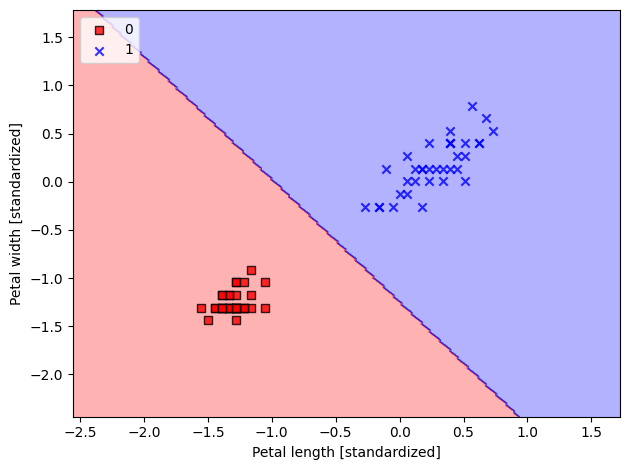

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgds = LogisticRegressionSGD(eta=0.3, n_iter=100, random_state=1)
lrgds.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

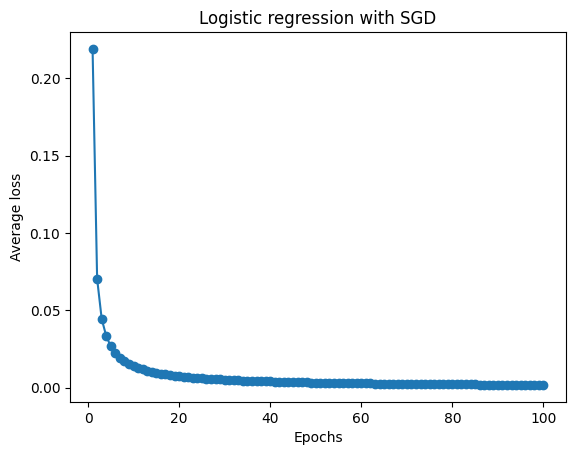

In [ ]:
plt.plot(range(1, len(lrgds.losses_) + 1), lrgds.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.title('Logistic regression with SGD')

#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

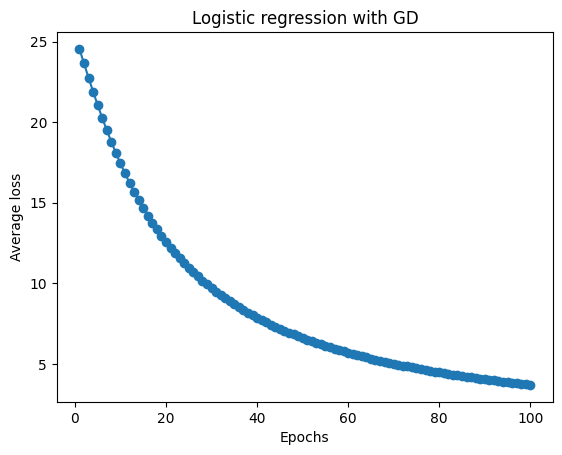

In [ ]:
plt.plot(range(1, len(lrgd.losses_) + 1), lrgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.title('Logistic regression with GD')
#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

How derive update weights?
First of all note that fixed an output value $z^{(i)}=w^{T}x^{(i)}$:
$$\frac{\delta\sigma}{\delta w_j}(z)=\frac{\delta \sigma}{\delta z} \cdot x_{j}$$.

Now $\frac{\delta \sigma}{\delta z}=\big(\frac{1}{1+e^{-z}}\big)'=\frac{e^{-z}}{(1+e^{-z})^2}=\frac{e^{-z}}{1+e^{-z}} \cdot \frac{1}{1+e^{-z}}=(1-\sigma(z))\sigma(z)$

So if we remember the training rule:
$$w_j:=w_j+dw_j$$ where $dw_j=-\eta\frac{\delta L}{\delta w_j}(⋅)$ and assume as loss function the *BCE($\cdot$)* we'll have:
$$w_j:=w_j-\eta\frac{\delta L}{\delta w_j}=w_j+\eta\sum_{i=1}^{n}(y^{i}-\sigma(z^{i}))x_j$$

##SCIKIT-LEARN LOGISTIC REGRESSION##

We take the first three samples and predict the probabilities to belong at different classes. We obtain an array $3 \times 3$ where the row is a probability vector
$p_j=[P(y=0|X_j),P(y=1|X_j),P(y=2|X_j)]$. Now

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


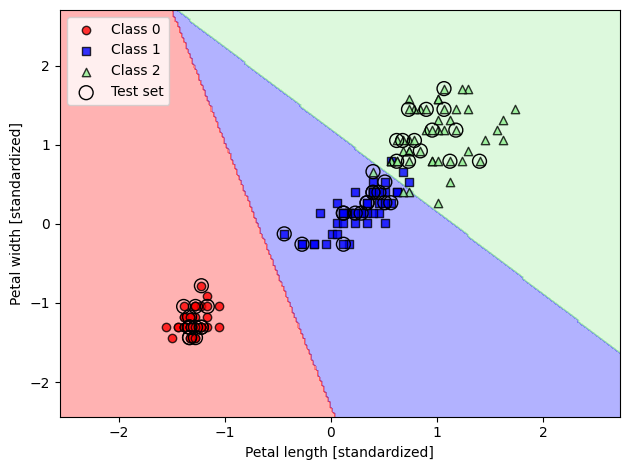

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [ ]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()




lr.predict_proba(X_test_std[:3, :])










In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

###Multinomal Logistic Regression###


Imagine now if we're working with a multiclassification problem, for example we want perform a task of sentiment classification with three labels \{positive,negative,neutral\}. In this case the label class is multivariate Bernulliana $Y=(Y_1,Y_2,Y_3)$ and the distribution of probability is:
$$P(Y=y)=P(Y_1=y_1,Y_2=y_2,Y_3=y_3)$$.

Now the marginal probability of $P(Y_i=y_i)=∑_{y_1,y_2\dots y_{i-1},y_{i+1}\dots y_k}P(Y_1=y_1,Y_2=y_2\dots Y_{i-1}=y_{i-1},Y_i=y_i,Y_{i+1}=y_{i+1}\dots Y_k=y_k)$
using the chain rule probability:
$P(Y_i=y_i)=∑P(Y_i=y_i|Y_1…Y_k)∏_{j=1}^{k}P(Y_j|\cap_{s=1}^{j-1}Y_s)$.

Now suppose the three class labels are indipendent bernullian, so it's related to the problem of hard classification: a sample points can be belongs only an unique class.


In this case the density function(probability mass function in discrete case) is:
$p(Y)=∏_{i=1}^{k}p(Y_i)=\prod_{i=1}^{k}p_i^{y_i}(1-p_i)^{1-y_i}$
that means the mass probability function of $Ber_{≃Y}(p_1…p_k)$.

Now we consider the approach to train k classifiers and obtain:
$P(Y_i=1|x)=\sigma(w_{i}^{T} x) \ \ i=1 \dots k$
this is known as ONEvsALL. For the class inference we take the highest score classifiers.

Another approach is tu use the softmax approach. Considering the logit function:
$logit(P(y=j|x))=w_{j} \cdot x$

Now $ln(P(y=j))=w_jx-ln(Z)$ where the last term is a regulation term. Now we obtain $P(y=j)=\frac{1}{Z}e^{z_j}$ and the regulation term is:
$1=\sum_{k=1 \dots K}(P(y=k))=\frac{1}{Z}\sum_ke^{z_k} \implies Z=∑_ke^{z_k}$.

Finally the probability $P(Y=j)=\frac{e^{z_j}}{\sum_{i=1 \dots k}e^{z_i}}$.


##Entropy & Categorical cross entropy

Entropy is a concept high related with information theory. Consider a discrete random variable $X: Ω \to R$ and we ask how much information is received when we observe a specific value of this variable.
The amount of information can be viewed as the 'degree of surprise' on learning the value of $X$.
If we are told that highly improbable event has just occurred than we'll have received more information than likely event. Then entropy can be viewed as the quantity of information that we'll need to encode the random variable. Our measure of information depends on the probability distribution $p(x)$ and so we're looking for a function $h(x)$ that is a decrescent function of $p(x)$ and express the information content.
So the entropy function is defined as $h(X=x)=-\log_{2}(p(x))$ and entropy for a random discrete variable is:
$H(X)=-\sum_{x}p(x)\log_2(p(x))$.
If we have $X$ continuos variable then the differential entropy is $H(X)=-\int_{Ω}p(x)\log_2(p(x))\ d\mu(x)$.










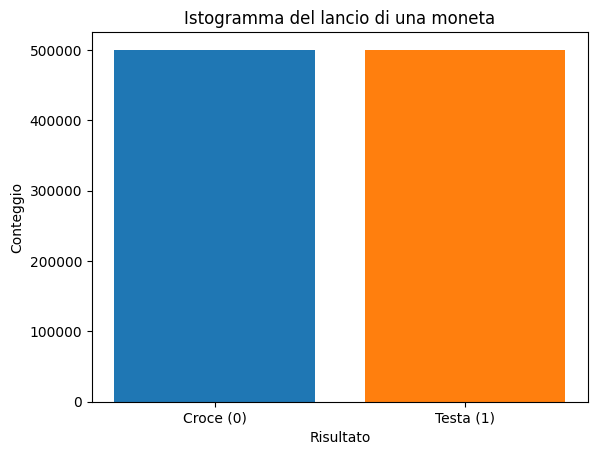

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulazione del lancio di una moneta
# 1 rappresenta testa (successo), 0 rappresenta croce (fallimento)
np.random.seed(42)  # Per riproducibilità
lanci_moneta = np.random.choice([0, 1], size=1000000)

# Conteggio delle occorrenze di testa (1) e croce (0)
valori, conteggi = np.unique(lanci_moneta, return_counts=True)

# Creazione dell'istogramma
plt.bar(valori, conteggi, tick_label=["Croce (0)", "Testa (1)"], color=['#1f77b4', '#ff7f0e'])
plt.title("Istogramma del lancio di una moneta")
plt.xlabel("Risultato")
plt.ylabel("Conteggio")
plt.show()


In [ ]:
import math

def entropia_bernoulliana(p):
    # Gestione dei casi limite in cui p è 0 o 1, per evitare errori di logaritmi.
    if p == 0 or p == 1:
        return 0
    # Calcolo dell'entropia secondo la formula data
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

# Esempio di utilizzo:
p = 0.5  # Probabilità di successo
entropia = entropia_bernoulliana(p)
print(f"L'entropia per p = {p} è: {entropia}")


L'entropia per p = 0.5 è: 1.0


##Maximum entropy principle##
Suppose now to face with the following problem. We have a random variable $X:[a,b] \to \mathbb{R}$ and an unkwon probability distribution function $p(x)$. We want to find the distribution that maximizes the entropy of $X$ that is $H(X)$.
Now we want costraints $\int_{Ω}p(x) \ dx = 1$.

In this case we use the Langrange multipliers: given a multivariate function $F(\bar{x}) : \mathbb{R}^{n} \to \mathbb{R}$ subject to costraints $g(x):\mathbb{R}^{n} \to \mathbb{R}^{c}, g(x) = k$ both $C^{1}$, maximaze or minimize $F$ is equivalent to find the critical points of *lagrangiana function* $L(\bar{x},\bar{λ})= F(x)+\bar{λ} ⋅ (g(x)-k)$.


In this case $F(x)=H(x)$ and costraint is $\int_{Ω}p(x) \ dx = 1$
Now the lagrangiana is:

$L = - \int_a^b p(x) \log(p(x)) \, dx + \lambda \left( \int_a^b p(x) \, dx - 1 \right)$
we'll have the following derivative:

$\frac{\partial{L}}{\partial{p(x)}}=-1-log(p(x))+\lambda=0 \implies p(x)=e^{\lambda-1}$

Then suibstuting in the following costraints: $\int_{a}^{b}e^{\lambda-1}dx = 1$ we'll obtain:
$(b-a)e^{\lambda-1}=1 \implies \lambda=1+\log(\frac{1}{b-a})$ then at the end we'll obtain $p(x)=\frac{1}{b-a}$

Suppose a random variable  $X$ with a preassigned standard deviation $σ$ and mean $μ$. Again the question is: Which function  $p(x)$ gives the maximum of the entropy  $H(x)$. In this case therare more than one single costraint:

$E(X)=\int p(x)x \ dx = \mu \ \ \ E(X-E(X))^{2} = \int (x-\mu)^{2} p(x) \ dx = \sigma^{2}$.

With basic calculus derivation we obtain:
$p^{*}(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-1/2{(\frac{x-\mu}{\sigma})}^2}$ the gaussian distribution.

##KL-divergence and mutual information##


###Regularitazion and handling overfitting###

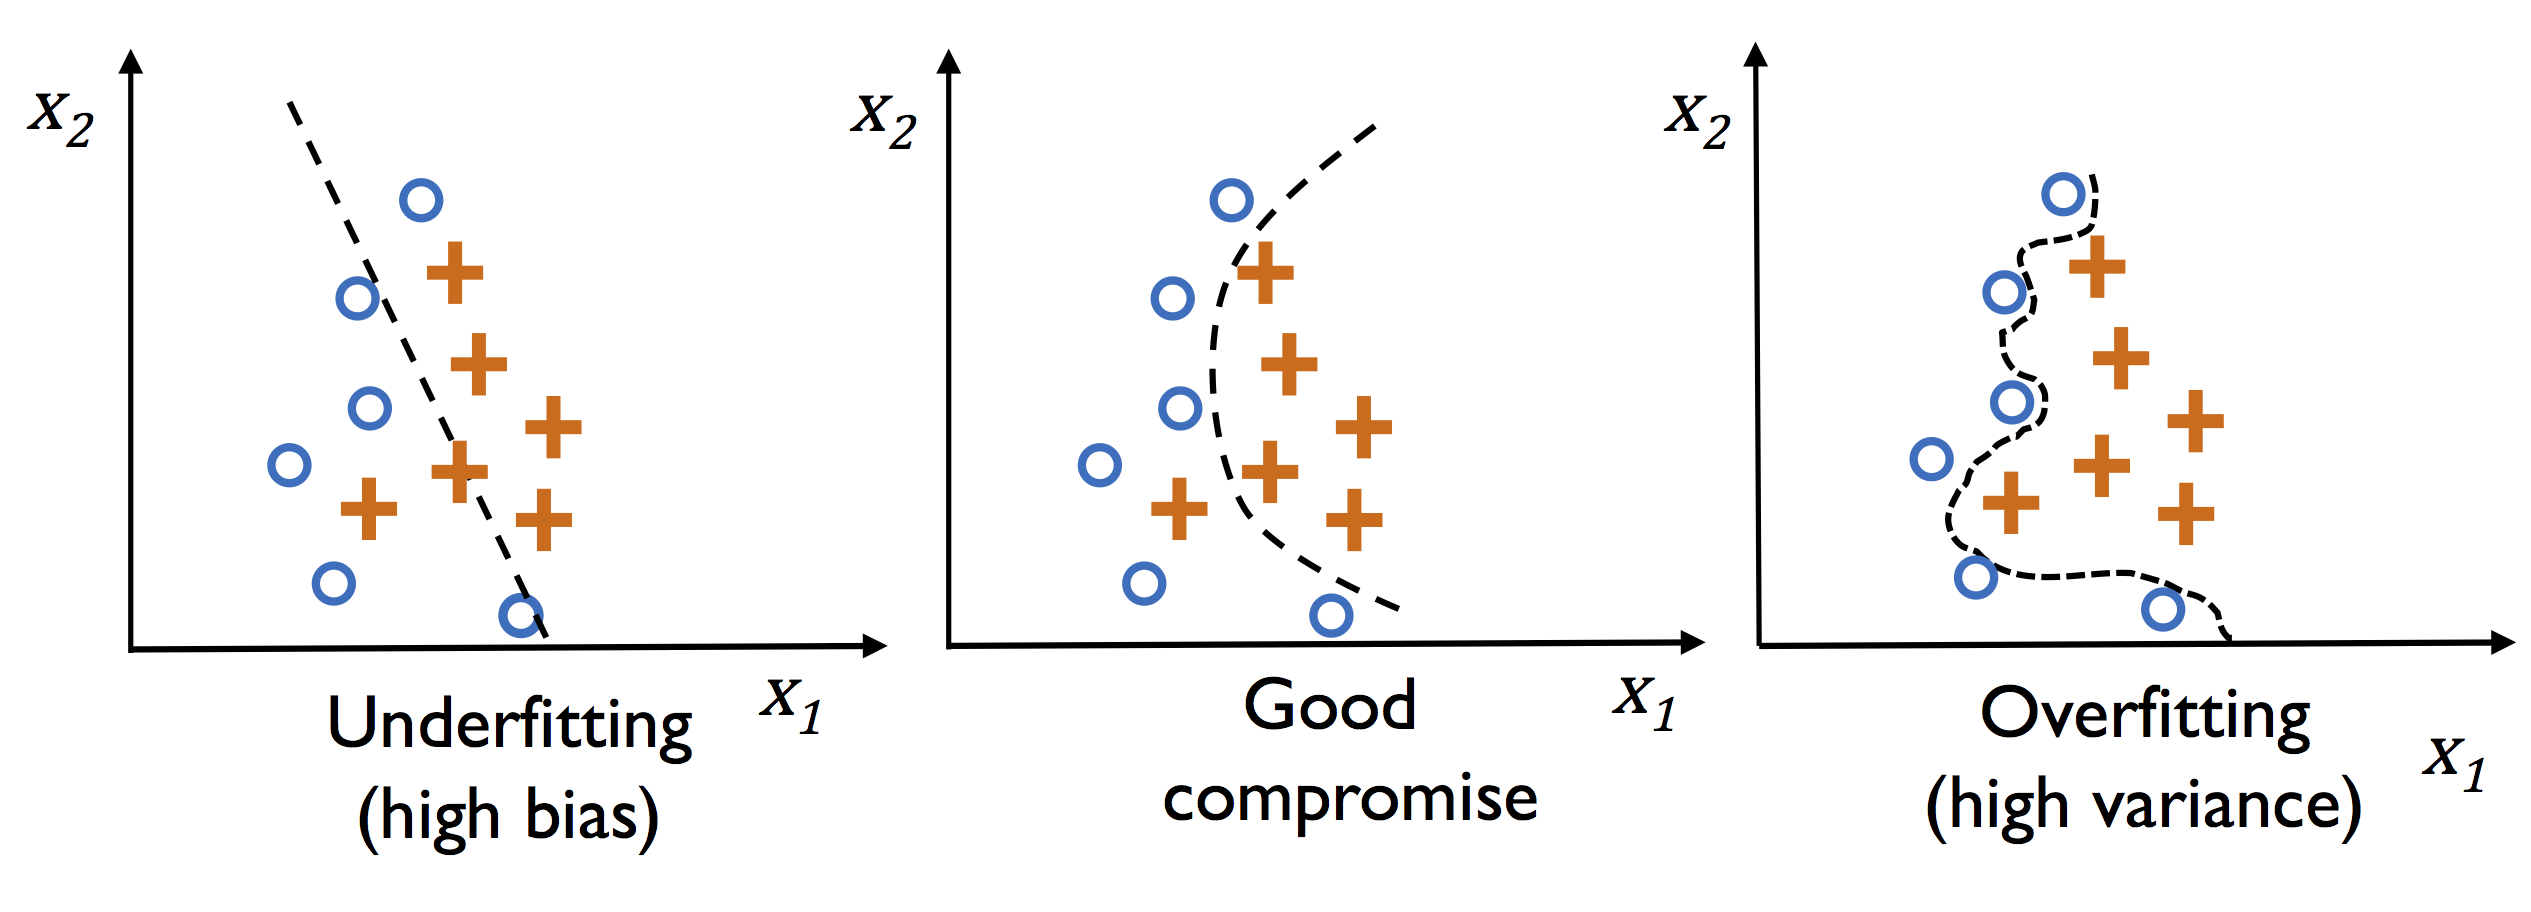

In [ ]:
from IPython.display import Image
Image(filename='./03_07.png', width=500)

The overfitting and underfitting problems are very frquent in building ML & DL model. We'll refer about overfitting problem when the model is very adapted to train data and has got low capability of generalization, so it'll perform very bad on unseen data(test-set). It is as the model learning only training data but it can't learn the pattern underlying data.

There are several causes for overfitting, for example a model too complex with a lot of parameters. The model that suffers overfitting it said has got high **variance**. Another reason is a poor training data that is not more representative or a corrupted training data.

Underfitting is the opposite problem. The model is to simple and doesn't perform well on the training data, because being simple it can't recognize the patterns among the data. Imagine to fit a well curve-shape relation beetwen data with a line. In this case the model it said has to go a high **bias**.

One of the most performant way to handle overfitting is the **regularization techinique**.

The regularization is a way to reduce the variance of the model and grow the bias to improve the capability of generalization of the model. The **l2** regularization norm(also called lasso regularization) is obtained adding a regularization term to cost function:

$J^{*}(w,D)=J(w,D)+\frac{\lambda}{2} ||w||_{2}$

where $w$ is a vectore of parameters and $\lambda$ is the **regularization parameter** that controls the strenght of shrinkage weights.

Now $∇J^{*}_w(w,D)=\lambda w +∇_wJ(w,D)$ and using Taylor approximation around $w^{*}$ the minime point of the unregulazed cost function:

$J(w,D)=J(w^{*})+1/2 (w-w^{*})^{T}H(w-w^{*})$ where $H$ is the Hessian matrix.

Suibsting in the regularized cost function and calculate the gradient:

$∇_{w}J^{*}(w,D)=λw+H(w-w^{*})$
and if $w$ is the minimum point, then $∇_{w}J^{*}(w,D)=0$. If the Hessian is symmetric(for example if we have a $C^{2}$ cost function) and $H$ invertible(for example definite positive)
$$w=(\lambda I +H)^{-1}Hw^{*}$$.

Now if we factorize the matrix $H$ with an ortonormal matrix and diagonal matrix finally we obtain:
$$ w_{i}=\frac{\alpha_{i}}{\alpha_{i}+\lambda}w_i^{*} $$

The $\alpha_i$ are the eingivalues of the matrix $H$ and the effect of weight decay is rescale the value of the weights aroun the principal axisis given by eingivalues.

If $\lambda >> \alpha_i$ then $w_i ≃0$.

Only directions along which the parameters contribute significantly to reducing the objective function are preserved relatively intact. In other unimportant instructions, indicated by a small eigenvalue of the Hessian, weight vectors are decayed away through the use of the regularisation throughout the training.

The regularisation constant, $\lambda$ is a hyperparameter and is tuned to get the best results. As the value of α increases, weights are decayed more.

A way to find a regularization term is by a probabilistic perspective.









#SUPPORT VECTOR MACHINE#

The goal of support vector machine is to find an optimal hyperplane to separate the classes. Similiarly to perceptron for wich we would look for a linear hyperplane minimizing the misclassification errors, in support vector machine we'are looking for an hyperplane maximizing the margin.

The margin is defined as the distance beetwen separate hyperplane(decision boundary) and training samples closest the decision boundary wich are called support vectors.





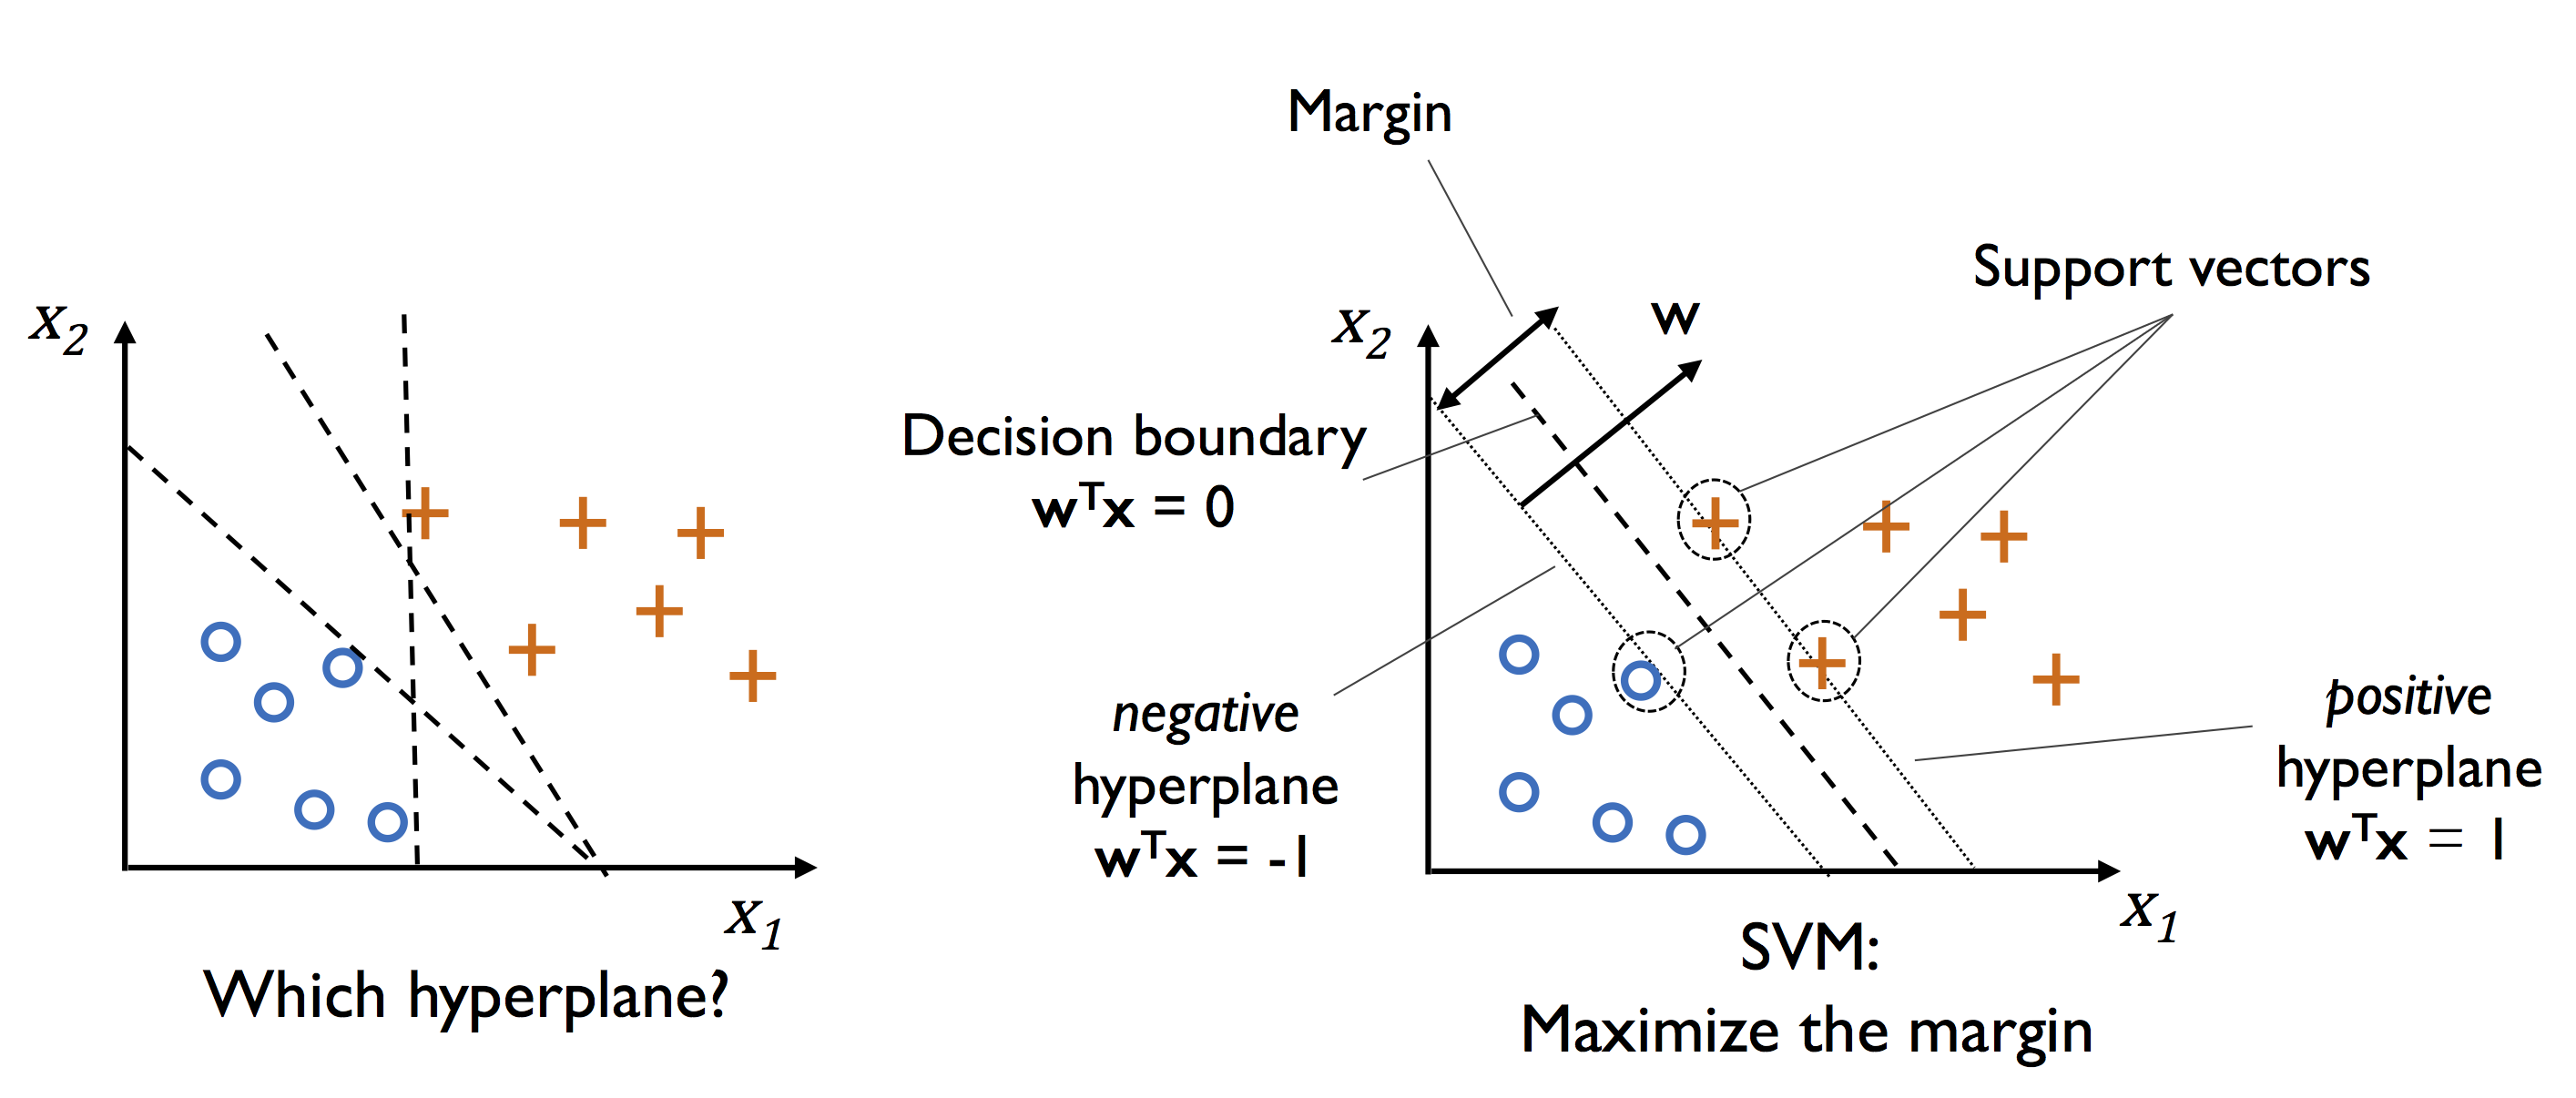

In [ ]:
from IPython.display import Image
Image(filename='03_09.png',width=800)

The decision boundary is $w_0+w^{T}x=0$ and the negative and positive hyperplanes are defined as:

$$ w_0+w^{T}x_{pos} = 1 \ \ \ \ \ \ \ \ w_0+w^{T}x_{neg} = -1$$

Now subtrac the two equations we'll obtain:
$$w^{T}(x_{pos}-x_{neg})=2$$
and normalizing for $||w||$ we obtain:
$$\frac{w^{T}}{||w||}(x_{pos}-x_{neg})=\frac{2}{||w||}$$

Now the objective of SVM is maximize the margin $\frac{2}{||w||}$ wich some costraints:
$y^{i}(w_{0}+w^{T}x^{i}) \geq 1$ where $i$ is the index that rapresents the samples.
It's more simple to minimize $\frac{1}{2}||w||^{2}$.

To handling a nonlinear data the linear costraints need to be relaxed nonlinearity separable data to allow the convergence of the optimization.
In this case we introduce the **slack variables**:
$$ w_0+w^{T}x^{i} \geq 1-η_{i} \quad w_0+w^{T}x^{i} \leq 1+η_{i} $$
And the objective function to maximize is:
$$ \frac{1}{2}||w||^{2}+C\sum_{i}η_{i}$$
where $C$ is an hyperparameter that controls penality for misclassification. A large value of $C$ restrict the width of hyperplane whereas the smaller value is for a larger width.
The objective is to tune the bias-variance trade off. A lower value of $C$ is for increas the bias and reduce the variance.

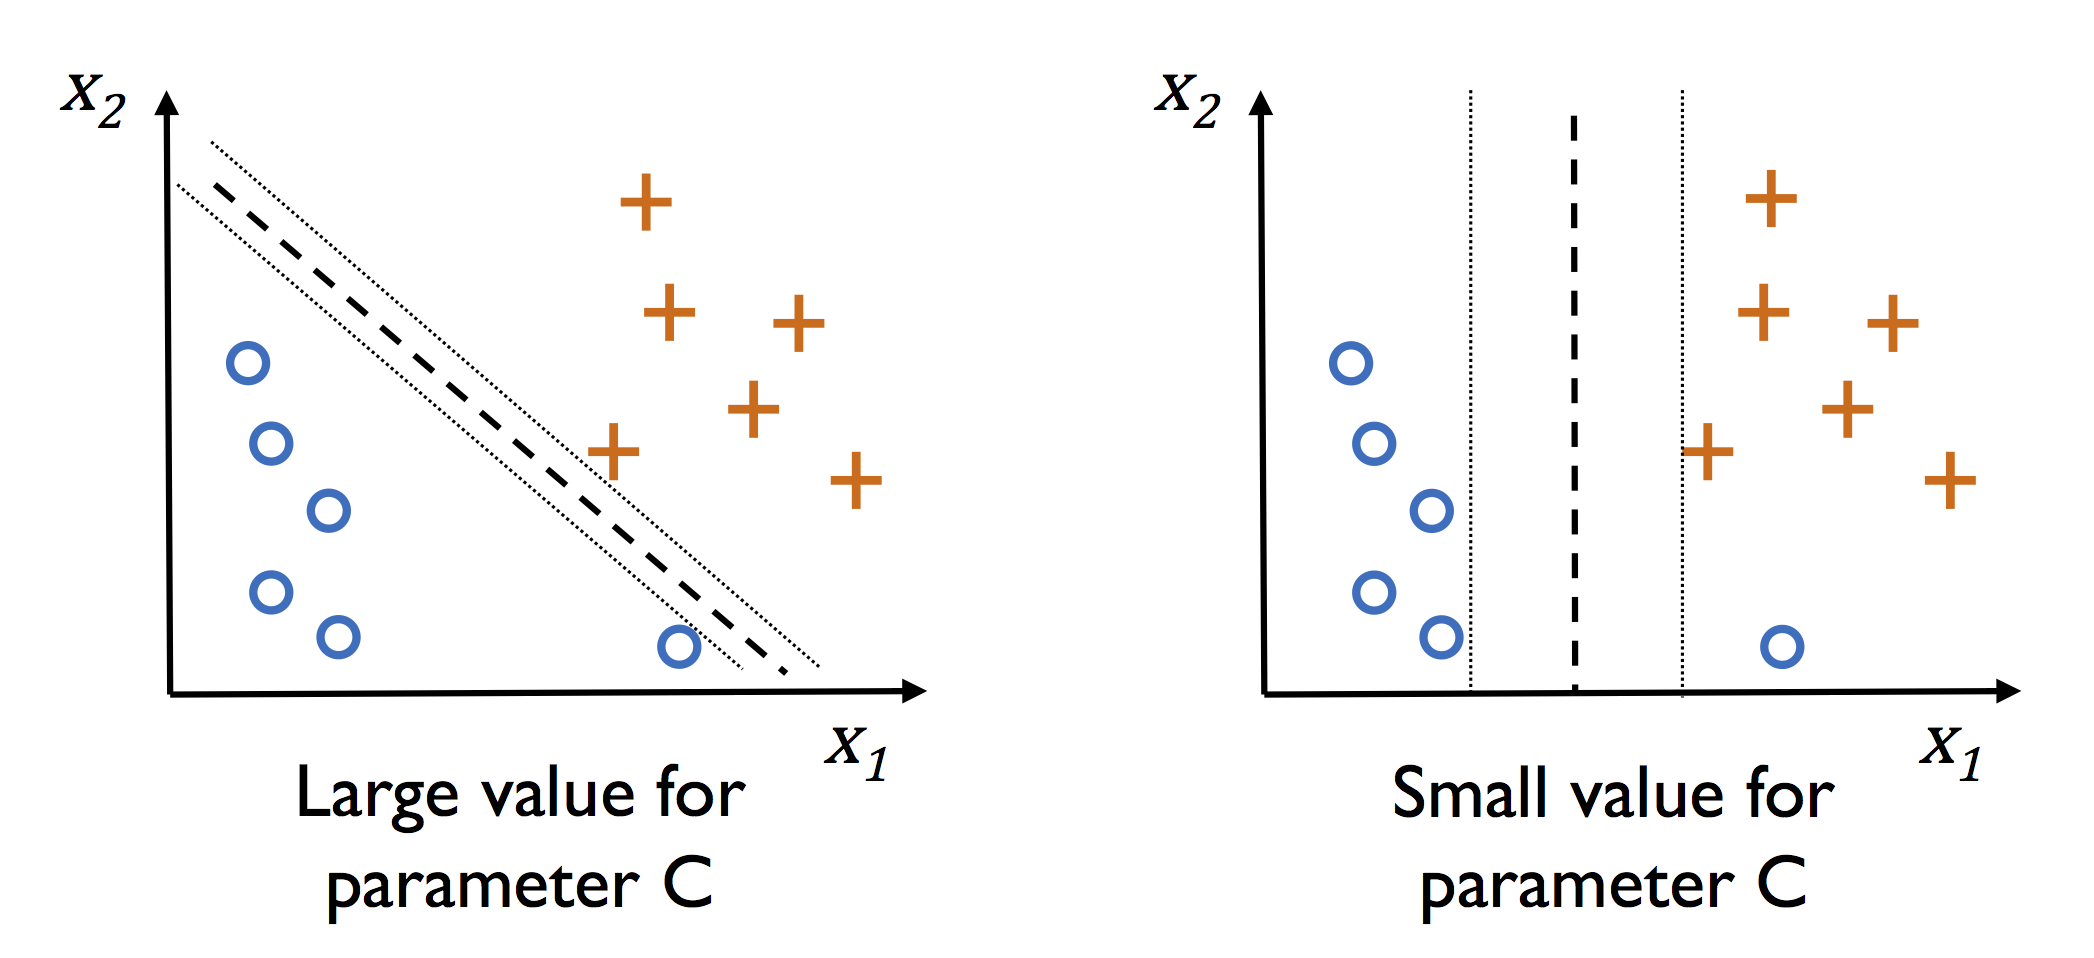

In [ ]:
from IPython.display import Image
Image(filename='03_10.png',width=800)

##Kernel methods##

The idea about kernel is the following: we have to face with no-lineary data points so we can do a transformation of the features space to map these in higher dimensional space wich now can be lineary separable. Formulation this:
we have a input space $\mathcal{X} \times \mathcal{X}$ and the transformation is a map $\phi(\cdot) : \mathcal{X} \to \mathcal{H}$ where $H$ is higher dimensional space. For example if we have a two dimensional dataset we can do:
$\phi(\cdot) : \mathbb{R}^{2} \to \mathbb{R}^{3} \quad \phi(x_1,x_2)=(x_1,x_2,x_1^{2}+x_2^{2})$.

Now the kernel metods can be very expansive if we have a large dataset, then we can utilize a *kernel trick* wich consists to replace the dot product beetwen the features with $\phi(x_1)^{T}\phi(x_2)$.

Then we can define a kernel function $k(x^{i},x^{j})=exp(-\lambda||x^{i}-x^{j}||^2)$ called gaussian kernel. Now if we have a datapoints:
$$y=\sum_{i}w_ik(x^{i},x)$$

Note that $k(\cdot)$ can be viewed as a similarity function and it's symmetric.



##Decision Tree learning##
The decision tree learning is famous model of supervised learning. It's very common for explanability. The model can be viewed as decision model where the output is given the different decision step. Imagine to want build a decision tree to classify the kind of animals, then we break down our data and making decision based on answer to the queries, it is all the decision tree does.

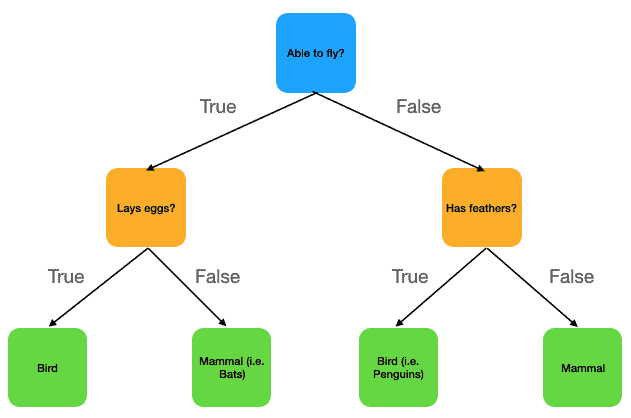

In [ ]:
from IPython.display import Image
Image(filename='tree_diagram.png',width=500)

As can be viewed in the image above, we have the following elements in a decision tree:

-**Root Node** is also called decisional node and it's the node for wich starts the splitting of the data. To determine this we want take the *feature* with highest metric of impurity value for example **Information Gain**.

-**Child Node** is another decision node and it's labeledd with another features following the criterion described above. Remember it's an iterative process so we'll chose at each step a feature to splitting the Data parent(splitted dataset from parent node)

-**Branch** it's an edge from parent node to child node and it's labelled with the value of the decision feature. Based on this value we have a dataset with samples that have this value for the feature choosen.

-**Leaf Node** The process is iterative and terminate when the child node are pure, that means each samples belongs at the same class. In this case the leaf node it's labelled with the class.



**Note** Sometimes cause the iteration of the process we may build a deep decision tree and it's more prone to overfitting. For this reason we'll use a way to **prune** the decision for example with a fixed max depth of the tree.


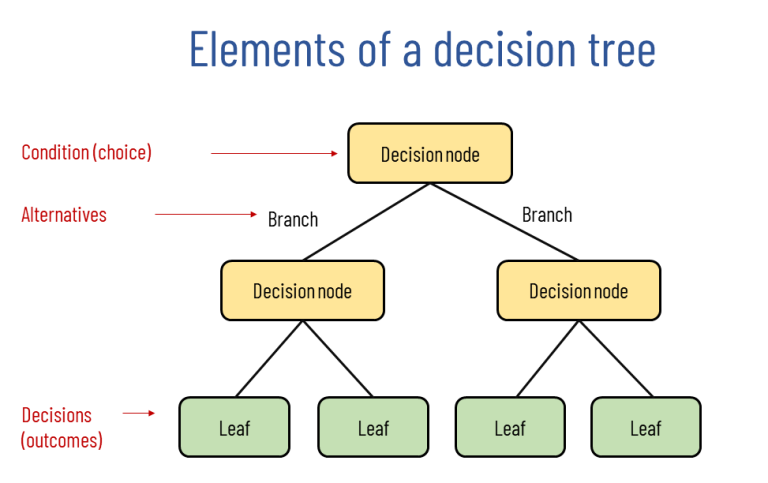

In [ ]:
from IPython.display import Image
Image(filename='Decision-Tree-elements-2.png',width=500)

##Objective function in decision tree##
In learning decision tree at each step we want to select the most informative feature to splitting data and taking decisions.
If we take as measure of *impurity* the entropy of a features(it's a random variable):
$$H(X)=-\sum_{i}p(X=x_i)\log_{2}(p(X=x_i))$$
if we define the mutual information as:
$$I(Y,X)=H(X)-H(Y|X)=H(X)-\sum_jp(Y=y_j|X)\log_2(p(Y=y_j|X))$$
then for a discrete random variable we have:
$$I(Y,X)=H(Y)-\sum_j\sum_i\frac{N_{ij}}{N_j}\log_2(\frac{N_{ij}}{N_j})$$.

The information gain in decision tree is:
$$IG(f,D_{parent})=I(D_{parent})-\sum_{j=1}^{m}\frac{N_j}{|D_{parent}|}I(D_j)$$
where $I(\cdot)$ is a impurity measure. Now we can use as impurity measure the entropy criterion.
The information gain with entropy criterion in decision tree is equal to mutual information: Suppose to have a dataset $D$ with $n$ features then let $D_{parent}$ as the dataset relative to parent node and $D_{child}$ the splitted dataset relative to child node. Let $f$ the features for wich calculate the information gain:
$$IG(f,D_{parent})=H(D_{parent})-\sum_{j=1}^{m}\frac{N_j}{|D_{parent}|}H(D_j)$$
where $m$ is the number of node.
Recall the notion of entropy of dataset and put $Y$ target variable:
$$H(D)=-\sum_{j=1}^{c}p(Y=j)\log_2(p(Y=j))$$

another way to reformulate all is the following:
if $f$ is the feature to perform the split and we have $Y$ the class target random variable then $p(Y|f=a)$ is the conditional probability of $Y$ respect to the child related to attribute $a$.
Now take $IG(f,D_{parent})=H(D_{parent})-H(D_{parent}|f)= H(D_{parent})-\sum_{a}p(f=a|D_{parent})H(D_a)$


where $D_a$ is the set $\{x^{j} \in D \ | f=a \} \cap D_{parent}$

So during the train the function objective to optimize is the information gain IG, the goal is maximize the IG at each step. Lower is the impurity of the child nodes higher is the information gain score, so if you use the entropy criterion as impurity measure your goal is maximize the mutual information of features.


Another impurity measure is the **Gini impurity**. In this case for each child node we calculate the probability of misclassification:
$$I_{G}(t)=\sum_{j=1}^{c}p(Y=y_j|t)(1-p(Y=y_j|t))= \\ 1-\sum_{j}p^{2}(Y=y_j|t)$$

In this case the function to optimizate on feature space is the gini impurity and we want to minimizate it.


Another impurity measure is the classification error:
$$I_{E}=1-max(p(Y=y_j)|t)$$

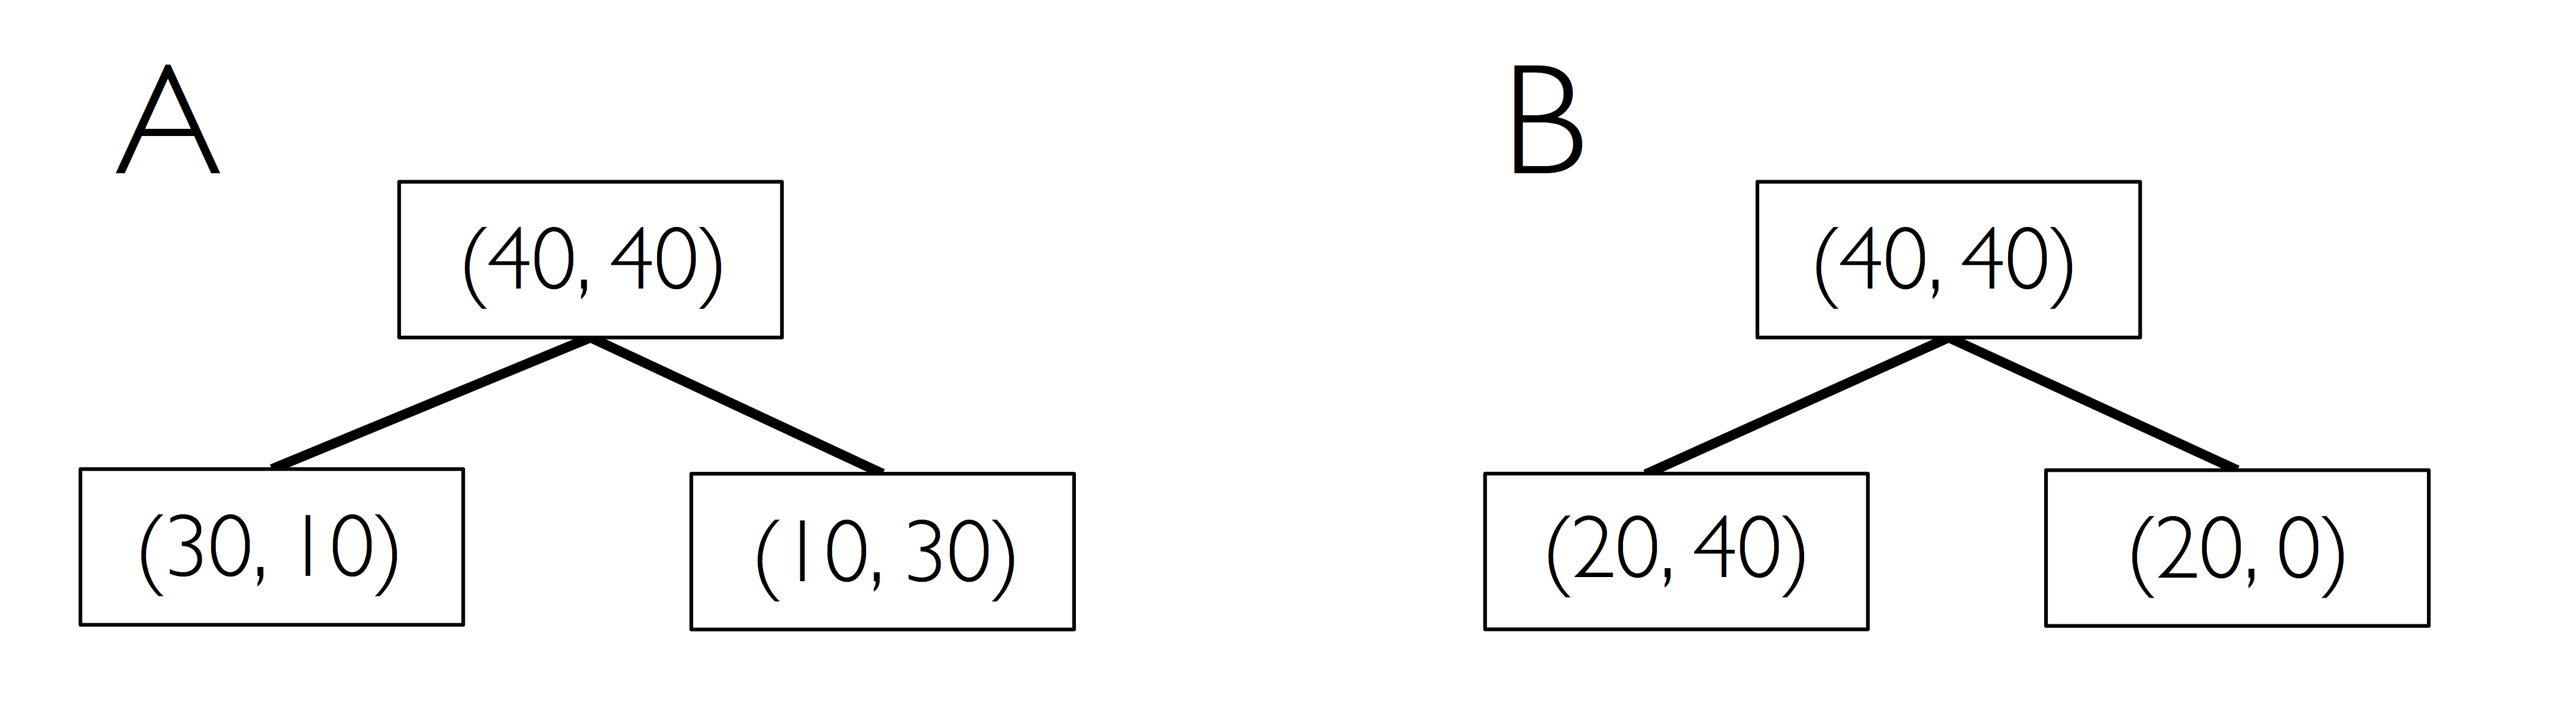

In [ ]:
from IPython.display import Image
Image(filename='03_18.png', width=500)

Now we calculate the information gain to decide the most informative feature.
Suppose we have a dataset with 40 negative samples and 40 positive samples. We need to create the root node. We'll use different impurity measure.

-Entropy criterion:
$$H(D_{parent})=H(Y)=-0.5\log_2(0.5)-0.5\log_2(0.5)=1$$ recall if the distribution of data is uniformly then by maximum entropy principle the entropy of dataset is maximum.
Calculate now the expected relative entropy:
$$H(D_{0})=H(D_{parent}|A=0)=-\frac{3}{4}\log_{2}(\frac{3}{4})-\frac{1}{4}\log_{2}(\frac{1}{4})=0.81$$

$$H(D_{1})=H(D_{parent}|A=1)=-\frac{1}{4}\log_{2}(\frac{1}{4})-\frac{3}{4}\log_{2}(\frac{3}{4})=0.81$$

Now we can calculate the Information Gain:

$$IG(A,D_{parent})=H(D)-\sum_{j=0}^{1}p(A=j|D_{parent})H(D_{j})=1-0.81=0.19$$

Note that $IG(A,D)=H(D)-\mathbb{E}_{P_A}(H(D_{parent}|A))$
\\
\\




-Misclassification probability criterion
$$I(D_{parent})=1-0.5=0.5$$

$$I(A=a_0)=1-\sum_{j=0}^{1}p^{2}(Y=j|a_0)=1-\frac{9}{16}-\frac{1}{16}=\frac{3}{8}$$

$$I(A=a_1)=1-\sum_{j=0}^{1}p^{2}(Y=j|a_1)=1-\frac{1}{16}-\frac{9}{16}=\frac{3}{8}$$

Then the information gain with gini impurity is:

$$IG(A,D_{parent})=I(D_{parent})-\sum_{j=0}^{1}p(A=a_j|D_{parent})I(A=a_j)= \\ 0.5-\frac{4}{8}3/8-\frac{4}{8}3/8=0.125$$




-classification error:

$$I_{E}(D)=1-\max(0.5,0.5)=0.5$$

$$I_{E}(A=a_0)=1-\max(3/4,1/4)=0.25 \ \ \ I_{E}(A=a_1)=1-\max(1/4,3/4)=0.25$$

Finally:

$$IG_{E}(A,D_{parent})=0.5-\frac{4}{8}0.25-\frac{4}{8}0.25=0.25$$

Now if we calculate the IG with both three criterion for the feature $B$ we'll have that gini impurity and entropy criterion favorite the split on B while the misclassification error is no sensitive to probability changes.

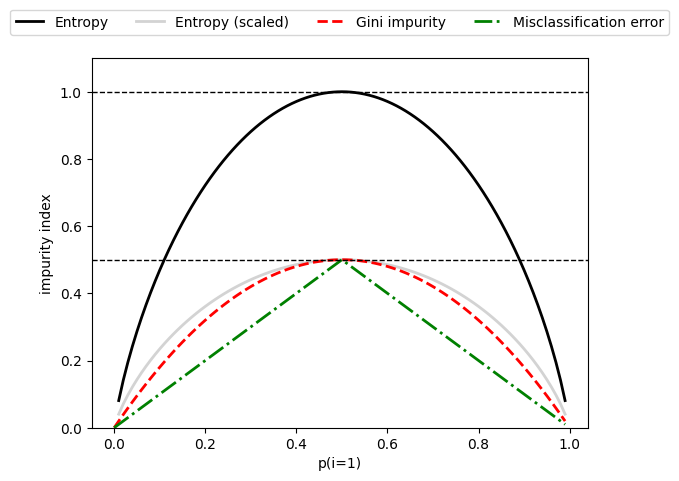

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

#Building a decision tree#
Remember the goal is choosen the best feature that reduces the impurity of dataset. So if at fixed step the samples of splitted dataset belongs at the same class then the impurity of the node is 0:
$$H(Y|t)=-\sum_{j=1}^{n}p(Y=y_j|t)\log_{2}(p(Y=y_j|t))=0$$
similiary with gini impurity:
$$I_g(t)=1-\sum_{j=1^{n}}p^{2}(Y=y_j|t)=0$$

Then at this step we have the leaf node. Another stopping criterion is if the splitting dataset is empty.



In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# load in the data
data = load_breast_cancer()

# isolate out the data we need
X             = data.data
y             = data.target
class_names   = data.target_names
feature_names = data.feature_names

# perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# fit a decision tree classifier with max_depth=2
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
#The depth of a decision tree is the length of the longest path from the root node to a leaf node.
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# compute performance on test set
y_pred = clf.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))

accuracy score: 0.94
precision score: 0.95
recall score: 0.96
f1 score: 0.95


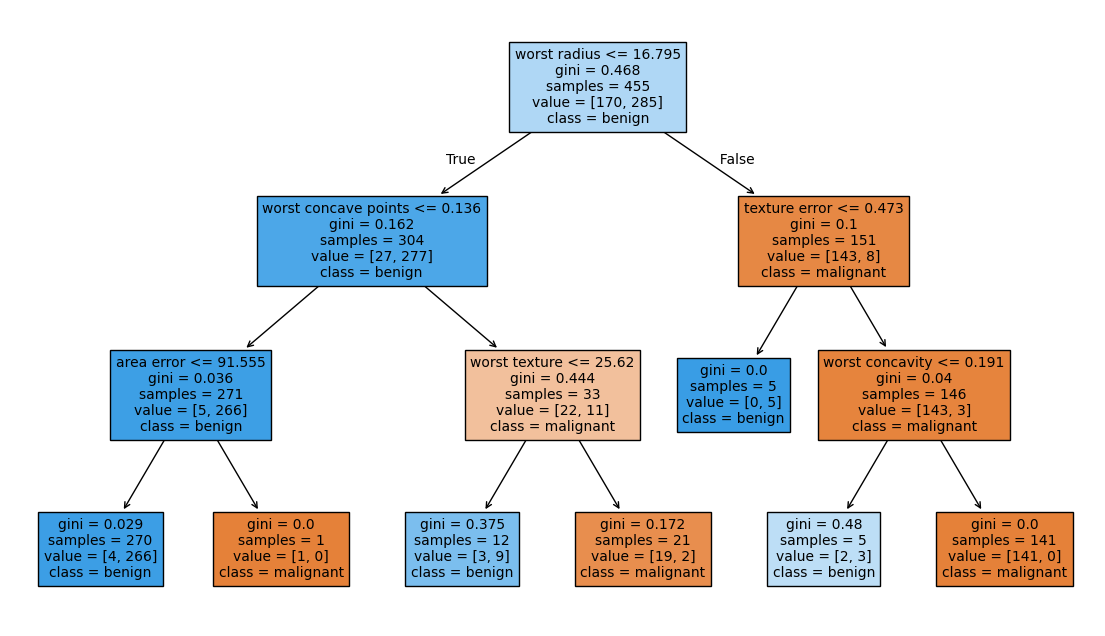

In [ ]:
# visualise the decision tree
fig = plt.figure(figsize=(14,8))
_ = plot_tree(clf,
              feature_names=feature_names,
              filled=True,
              class_names=class_names,
              fontsize=10)

For each node we have:

- The best splitting feature based on the gini impurity. Lower is the gini impurity highest is the information gain.
- The value of gini impurity, and can be seen as when the gini impurity is 0 each samples belong to same class and it will be the dominant class.
- The samples are the number of samples after the splitting data
- Number of samples for each class
- Class dominant
- Darkest colour indicate the most pure node

In [ ]:
# look at the feature importances
dfFeatures = pd.DataFrame({'Features':feature_names.tolist(),'Importances':clf.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(5)

Features  Importances
20          worst radius     0.763804
27  worst concave points     0.127061
11         texture error     0.047673
21         worst texture     0.033652
26       worst concavity     0.017869

In [ ]:
# function to plot one side of the Decision Tree
def plot_tree_side(dfNode: pd.DataFrame, feature: str, split_point: float, title: str) -> None:
    # obtain left and right leaf nodes
    dfLeftNode = dfNode[dfNode[feature]<=split_point].copy()
    dfRightNode = dfNode[dfNode[feature]>split_point].copy()
    # produce plot
    p1 = plt.scatter(dfLeftNode['worst radius'].values,dfLeftNode[feature],marker='o',color='blue')
    p2 = plt.scatter(dfRightNode['worst radius'].values,dfRightNode[feature],marker='^',color='red')
    plt.legend((p1,p2),('benign','malignant'))
    plt.hlines(split_point,xmin=dfNode['worst radius'].min(),xmax=dfNode['worst radius'].max(),color='green')
    plt.xlabel('worst radius')
    plt.ylabel(feature)
    plt.title(title)
    plt.show()

In [ ]:
# organise data into dataframes
dfTrain = pd.DataFrame(X_train,columns=feature_names)
dfTrain['label'] = y_train

dfTest = pd.DataFrame(X_test,columns=feature_names)
dfTest['label'] = y_test

In [ ]:
dfLHS = dfTrain[dfTrain['worst radius']<=16.795].copy()
dfRHS = dfTrain[dfTrain['worst radius']>16.795].copy()

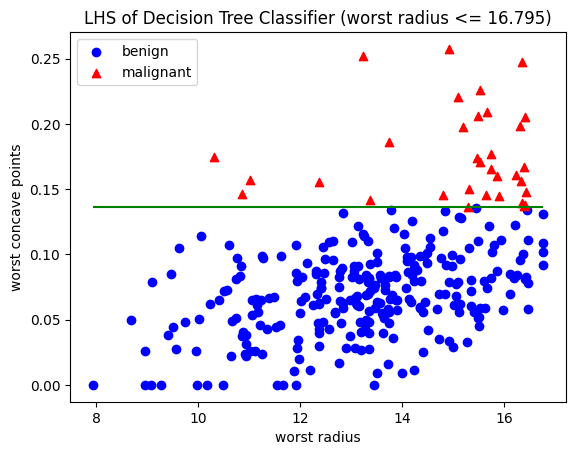

In [ ]:
# plot LHS of tree
plot_tree_side(dfLHS,
               'worst concave points',
               0.136,
               'LHS of Decision Tree Classifier (worst radius <= 16.795)')

##Random forest##

Random forest is an example of **ensemble model**. Despite classic decision tree, random forest is more robust to the noise than it, and it's less sensitive to overfitting. To construct random forest we have to follow these steps:

- Draw a random **bootstrap** sample of size $n$ (select randomly $n$ samples from training set with replacement)

- From a bootstrap of size $n$ construct your decision tree in this way:

   - Select randomly a subset of features from the feature space
   - Evaluate the feature to choose the best feature for splitting, based on some impurity criterion, for instance entropy related to maximize the information gain.

- Using a **majority vote** to predictions.

Some observations:

Let's start to consider the size $n$ of bootstrap sampling. If $n$ decrease we can obtain a decision trees with high diversity beetween them. This is because reducing the sample space leading a lower probability that we get a fixed training sample and increase the randomless of random forest. This is a good solution to reduce overfitting and decrease the variance of the model. In this case the given bootstrap consider the training samples indipendent with covariance $0$. However reducing the sample size can leading a lower performance in traing set and overall in testing set.
Conversely increase the sample size may to leading the risk of overfitting because we generate more similiar trees.
A good compromess of the optimal bias-variance trade-off is taking $n=|D_{training}|$ and it's tipically what is in pratical implementation with scikit-learn.

Now consider the size of feature subset. In general we may put $d << k$ where $d$ is the size of features subset and $k$ is the number of the features.
A reasonal default implementation used in scikit-learn is $d=\sqrt{k}$.



In [2]:
# load in the data
data = load_breast_cancer()

# isolate out the data we need
X             = data.data
y             = data.target
class_names   = data.target_names
feature_names = data.feature_names

# perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators = 25, random_state=1,max_depth=10,min_samples_split=20,n_jobs=2)
forest.fit(X_train,y_train)

#criterion is the criterion of impurity, n_estimators is the number of trees, max_depth is the depth of the tree, min_samples_split is the minimum number to split the internal node of a tree

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=25,
                       n_jobs=2, random_state=1)

In [4]:
y_pred = forest.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))

accuracy score: 0.95
precision score: 0.96
recall score: 0.96
f1 score: 0.96


##K-Nearest Neighbors##
This is a particular model of *lazy learner* because it doesn't learn any discriminative function but memorizes the training data.

The process of the model is the following:

- Select the paramter $k$(wich represents the number of neighbors samples) and a metric distance (to evaluate the different from the neighbors and new instance)

- The model select the $k$ samples wich are closest the new instance where closest is based on a metric $d(x_i,z) \ i=1\dots k$

- The prediction is made with a majority voting schema.



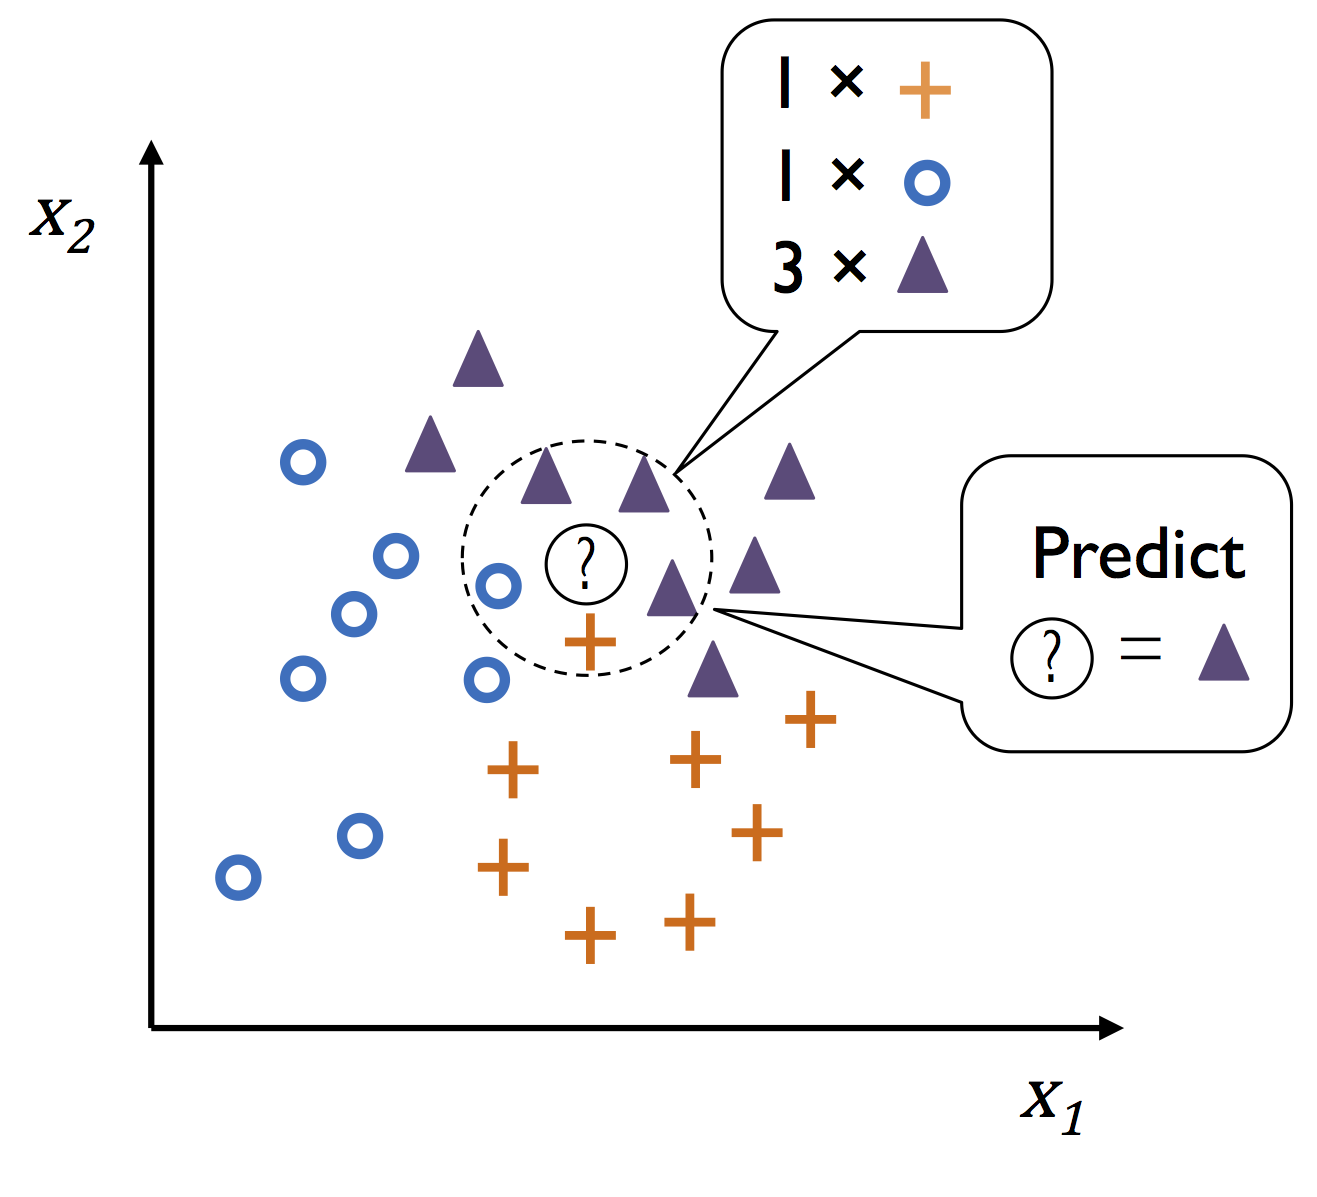

In [9]:
from IPython.display import Image
Image(filename='03_23.png',width=500)

The main advantage of **memory-based** approach is the model adapts to new training data, so it's more convenient if we are working with flows of data or in online learning. However the computational cost is very high, because the training data are not discard because you don't want learning any function but at each step you have to use all of data.
Two observation:
$k$ is the parameter that control the overfitting. Select the optimal value is a challenge. Then the metric distance is choosen based on the features domain. You mai choose for example the $L_{p}$ distance if we are handling continuos features:
$$d(x_i,x_j)=||x_i-x_j||_{p}$$

##The curse of dimensionality##
The KNN is very susceptible to overfitting cause the curse of dimensionality. This is because when we're working with a large training data the space of features becames very sparse, and may be some features that are very far despite the calculated metric is good. So this is a problem for a correct prediction.
In these model Random forest or KNN where we have not any function to learn, we can't use the regularization techiniques that we have seen. In this case we have to work on dimensionality of the data domain. This work involves different steps as feature selection or feature engineering and others.

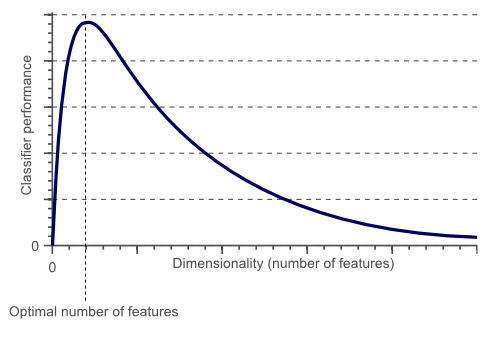

In [10]:
from IPython.display import Image
Image(filename='classifier20dimensionality.png',width=500)